In [ ]:
faimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, ttest_ind
import math
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
palette = sns.color_palette("crest", as_cmap=False)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("cleansed_data.csv")
df.head(5)

,square,property-status,number-of-bedrooms,number-of-bathrooms,apartment-type,legal-documents,interior-status,ownership_status,corner_apartment,district,view,latitude,longitude,ty/m2,price
0,58.0,Đã bàn giao,2.0,1.0,Chung cư,Hợp đồng mua bán,Bàn giao thô,Môi Giới,0,Quận 12,0.5,10.865247,106.664056,0.038500,2.27
1,107.8,Đã bàn giao,3.0,3.0,Chung cư,Đang chờ sổ,Bàn giao thô,Môi Giới,0,Quận Bình Thạnh,0.5,10.796357,106.716996,0.086000,10.50
2,28.0,Đã bàn giao,1.0,1.0,Officetel,Đang chờ sổ,Nội thất cao cấp,Cá nhân,0,Quận 4,0.0,10.762948,106.696376,0.068500,2.30
3,59.1,Đã bàn giao,2.0,2.0,Chung cư,Sổ hồng riêng,Bàn giao thô,Môi Giới,0,Quận 9,0.5,10.840521,106.828239,0.041500,2.30
4,74.0,Đã bàn giao,2.0,2.0,Chung cư,Sổ hồng riêng,Hoàn thiện cơ bản,Môi Giới,0,Quận 5,0.5,10.753490,106.648058,0.047182,1.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   square               5181 non-null   float64
 1   property-status      5181 non-null   object 
 2   number-of-bedrooms   5181 non-null   float64
 3   number-of-bathrooms  5181 non-null   float64
 4   apartment-type       5181 non-null   object 
 5   legal-documents      5181 non-null   object 
 6   interior-status      5181 non-null   object 
 7   ownership_status     5181 non-null   object 
 8   corner_apartment     5181 non-null   int64  
 9   district             5181 non-null   object 
 10  view                 5181 non-null   float64
 11  latitude             5181 non-null   float64
 12  longitude            5181 non-null   float64
 13  ty/m2                5181 non-null   float64
 14  price                5181 non-null   float64
dtypes: float64(8), int64(1), object(6)
mem

# 1.KHAI PHÁ DỮ LIỆU

## Kiểm tra dữ liệu trùng lắp

In [ ]:
unique_counts = df.nunique()
print(unique_counts)

square                  457
property-status           2
number-of-bedrooms        5
number-of-bathrooms       5
apartment-type            6
legal-documents           4
interior-status           4
ownership_status          3
corner_apartment          2
district                 23
view                      3
latitude               1233
longitude              1235
ty/m2                   227
price                   687
dtype: int64


Sắp xếp các cột có kiểu dữ liệu là số theo số lượng giá trị duy nhất


In [ ]:
numerical = df.select_dtypes(include='number')
unique_counts = numerical.nunique()
sorted_numerical_counts = unique_counts.sort_values(ascending=False)
numerical_count = df.select_dtypes(include='number').shape[1]
print(sorted_numerical_counts)
print(numerical_count)

longitude              1235
latitude               1233
price                   687
square                  457
ty/m2                   227
number-of-bedrooms        5
number-of-bathrooms       5
view                      3
corner_apartment          2
dtype: int64
9


Kiểm tra chi tiết giá trị trong dữ liệu số

In [ ]:
for column_name, count in sorted_numerical_counts.items():
      unique_values = sorted(list(df[column_name].unique()))
      print(f"{column_name}: {unique_values}")

longitude: [106.3655557, 106.4378653, 106.4513945, 106.4549955, 106.4975965, 106.4976576, 106.5009688, 106.5093763, 106.511162, 106.5152411, 106.5198546, 106.5319512, 106.5328179, 106.5344335, 106.5375626, 106.5401508, 106.5422889, 106.542331, 106.5430758, 106.5434283, 106.5445371, 106.5494159, 106.5569341, 106.5617012, 106.5682302, 106.5710228, 106.5730929, 106.5753163, 106.5755803, 106.5755927, 106.5767434, 106.5780748, 106.5785988, 106.5786108, 106.5787631, 106.5792519, 106.5800703, 106.5803854, 106.5805106, 106.5807964, 106.5810171, 106.5812037, 106.5817841, 106.5818006, 106.5820251, 106.5826559, 106.5828829, 106.5831354, 106.5837454, 106.5843246, 106.5849016, 106.5851381, 106.5851548, 106.5853052, 106.5861444, 106.5871996, 106.587228, 106.5872658, 106.588186, 106.5886886, 106.5889536, 106.5901479, 106.5901586, 106.5906962, 106.5909165, 106.591113, 106.5911177, 106.5911878, 106.5913062, 106.5913855, 106.5923407, 106.5925687, 106.5927205, 106.593053, 106.5939942, 106.5941286, 106.59


Các cột có dữ liệu dạng số nhưng là biến phân loại
+ number-of-bedrooms
+ number-of-bathrooms
+ view
+ corner_apartment

Số nhóm khác nhau trong từng biến phân loại

In [ ]:
categorical = df.select_dtypes(include='object')
unique_counts = categorical.nunique()
sorted_categorical_counts = unique_counts.sort_values(ascending=False)
categorical_count = df.select_dtypes(include='object').shape[1]
print(sorted_categorical_counts)
print(categorical_count)

district            23
apartment-type       6
legal-documents      4
interior-status      4
ownership_status     3
property-status      2
dtype: int64
6


Kiểm tra chi tiết giá trị trong dữ liệu phân loại

In [ ]:
for column_name, count in sorted_categorical_counts.items():
      unique_values = list(df[column_name].unique())
      print(f"{column_name}: {unique_values}")

district: ['Quận 12', 'Quận Bình Thạnh', 'Quận 4', 'Quận 9', 'Quận 5', 'Quận Bình Tân', 'Thành phố Thủ Đức', 'Quận Tân Phú', 'Quận 2 cũ', 'Huyện Bình Chánh', 'Quận 7', 'Quận 1', 'Quận 8', 'Quận Tân Bình', 'Huyện Nhà Bè', 'Quận 3', 'Quận Phú Nhuận', 'Quận 6', 'Quận 11', 'Quận 10', 'Quận Gò Vấp', 'Huyện Hóc Môn', 'Huyện Cần Giờ']
apartment-type: ['Chung cư', 'Officetel', 'Penthouse', 'Duplex', 'Căn hộ dịch vụ, mini', 'Tập thể, cư xá']
legal-documents: ['Hợp đồng mua bán', 'Đang chờ sổ', 'Sổ hồng riêng', 'Hợp đồng đặt cọc']
interior-status: ['Bàn giao thô', 'Nội thất cao cấp', 'Hoàn thiện cơ bản', 'Nội thất đầy đủ']
ownership_status: ['Môi Giới', 'Cá nhân', 'Chuyên trang môi giới']
property-status: ['Đã bàn giao', 'Chưa bàn giao']


Tổng kết về các biến số và biến phân loại

In [ ]:
num_cols = df.select_dtypes(include=np.number).columns.to_list()
cat_cols = df.select_dtypes(include='object').columns.to_list()

additional_cat_cols = ['number-of-bedrooms', 'number-of-bathrooms', 'view', 'corner_apartment']

cat_cols.extend(additional_cat_cols)
num_cols = [col for col in num_cols if col not in additional_cat_cols]

print('Số lượng các cột biến số là:', len(num_cols))
print('Danh sách các cột biến số:', num_cols)

print('Số lượng các cột biến phân loại là:', len(cat_cols))
print('Danh sách các cột biến phân loại:', cat_cols)

Số lượng các cột biến số là: 5
Danh sách các cột biến số: ['square', 'latitude', 'longitude', 'ty/m2', 'price']
Số lượng các cột biến phân loại là: 10
Danh sách các cột biến phân loại: ['property-status', 'apartment-type', 'legal-documents', 'interior-status', 'ownership_status', 'district', 'number-of-bedrooms', 'number-of-bathrooms', 'view', 'corner_apartment']


**Giới thiệu bộ dữ liệu Key Factors Affecting Housing Prices in HCMC:**

Đây là một tập dữ liệu các yếu tố liên quan và có ảnh hưởng đến giá bán chung cư/căn hộ ở khu vực Thành phố Hồ Chí Minh. Bộ dữ liệu được xây dựng từ các dữ liệu trên bài đăng của người dùng về căn hộ/chung cư được rao bán trên trang web Chợ Tốt tại khu vực Thành phố Hồ Chí Minh và được chúng tôi thu thập tháng 09/2024. Bộ dữ liệu có tổng cộng 5181 mẫu và 15 biến đặc điểm. Cụ thể các biến đặc điểm như sau:

-----

**square**: Đây là một biến số thập phân dương, chỉ ra diện tích của các chung cư/ căn hộ.

**property-status**: Đây là một biến chuỗi, biểu thị trạng thái của chung cư/ căn hộ bao gồm "đã bàn giao" và "chưa bàn giao".

**number-of-bedrooms**: Đây là một biến số nguyên dương, chỉ ra số lượng giường ngủ.

**number-of-bathrooms**: Đây là một biến số nguyên dương, chỉ ra số lượng phòng tắm.

**apartment-type**: Đây là một chuỗi phân loại chỉ ra loại hình chung cư hoặc căn hộ. Gồm có: chung cư; căn hộ dịch vụ, mini; oficetel; tập thể, cư xá; Penhouse; và Duplex.


**legal-documents**: Đây là một biến chuỗi, biểu thị tình trạng pháp lý của chung cư/ căn hộ.

**interior-status**: Đây là một biến chuỗi, chỉ ra tình trạng nội thất (cơ bản, đầy đủ, hoàn thiện)

**ownership_status**: Đây là một biến chuỗi, biểu thị trạng thái sở hữu của chung cư/ căn hộ gồm có "chính chủ" và "môi giới".

**corner_apartment**: Đây là một biến chuỗi, chỉ ra liệu rằng chung cư/ căn hộ này ccó phải là căn góc hay không

**district**: Đây là một biến chuỗi, chỉ ra tên quận của chung cư/ căn hộ này.

**view**: Đây là một biến số thập phân dương, nếu chung cư/ căn hộ có view sông thì giá trị 1, có view bất kì thì giá trị 0.5 còn không có view thì mang giá trị 0.

**latitude**: Đây là một biến số thập phân dương, chỉ ra vĩ độ của các chung cư/ căn hộ.

**longitude**: Đây là một biến số thập phân dương, chỉ ra kinh độ của các chung cư/ căn hộ.

**ty/m2**: Đây là một biến số thập phân dương, đại diện cho bao nhiêu tỷ trên m2 được crawl trên Chotot.com, trang web sẽ có danh sách các dự án và giá nền của dự án đó.

**price**: Đây là một biến số thập phân dương, chỉ ra giá bán của các chung cư/ căn hộ (đơn vị là tỷ).

# 2.PHÂN TÍCH KẾT HỢP TRỰC QUAN DỮ LIỆU

## 2.1 Quan sát thống kê mô tả

In [ ]:
df[num_cols].describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
square,5181.0,74.099761,37.968775,10.000000,56.000000,68.000000,83.000000,600.000000
latitude,5181.0,10.778397,0.049348,10.417711,10.736996,10.777259,10.812098,10.904562
longitude,5181.0,106.684297,0.069597,106.365556,106.627538,106.674057,106.729236,106.933611
ty/m2,5181.0,0.047182,0.034230,0.010850,0.035000,0.045500,0.051000,0.544250
price,5181.0,3.891960,5.212653,0.250000,1.980000,2.750000,4.000000,125.000000


Nhận xét:
+ square, ty/m2, và price có khoảng giá trị lớn và độ lệch lớn. Đồng thời có xu hướng lệch phải.
+ latitude, longtitude và ty/m2 có khoảng giá trị nhỏ, có xu hướng phân phối chuẩn.

In [ ]:
df[cat_cols].astype(str).describe(include='all').T

,count,unique,top,freq
property-status,5181,2,Đã bàn giao,4097
apartment-type,5181,6,Chung cư,4883
legal-documents,5181,4,Sổ hồng riêng,2601
interior-status,5181,4,Bàn giao thô,1985
ownership_status,5181,3,Môi Giới,4039
district,5181,23,Quận 9,561
number-of-bedrooms,5181,5,2.0,3273
number-of-bathrooms,5181,5,2.0,3418
view,5181,3,0.0,3042
corner_apartment,5181,2,0,3982


Nhận xét:
+ Đa số các biến phân loại có số lần xuất hiện của giá trị xuất hiện nhiều nhất thường chiếm tỷ lệ lớn trên tổng mẫu quan sát
-> Dữ liệu mất cân bằng

## 2.2 Biến số

### Phân tích sơ bộ

In [ ]:
def plot_distribution(data, col):
    skewness = round(data[col].skew(), 2)
    plt.figure(figsize=(20, 6))

    # Sử dụng bảng màu "crest"
    palette = sns.color_palette("crest", as_cmap=False)

    # Histogram with thicker edges
    plt.subplot(1, 3, 1)
    sns.histplot(data[col], kde=False, edgecolor='black', linewidth=1.5, color=palette[0], bins=20)
    plt.ylabel('Count')

    # Boxplot with thicker borders
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[col], linewidth=1.5, color=palette[2])

    # KDE plot with thicker line
    plt.subplot(1, 3, 3)
    sns.kdeplot(data[col], fill=True, linewidth=2, color=palette[3])
    plt.ylabel('Density')

    plt.tight_layout()
    plt.show()

    return skewness

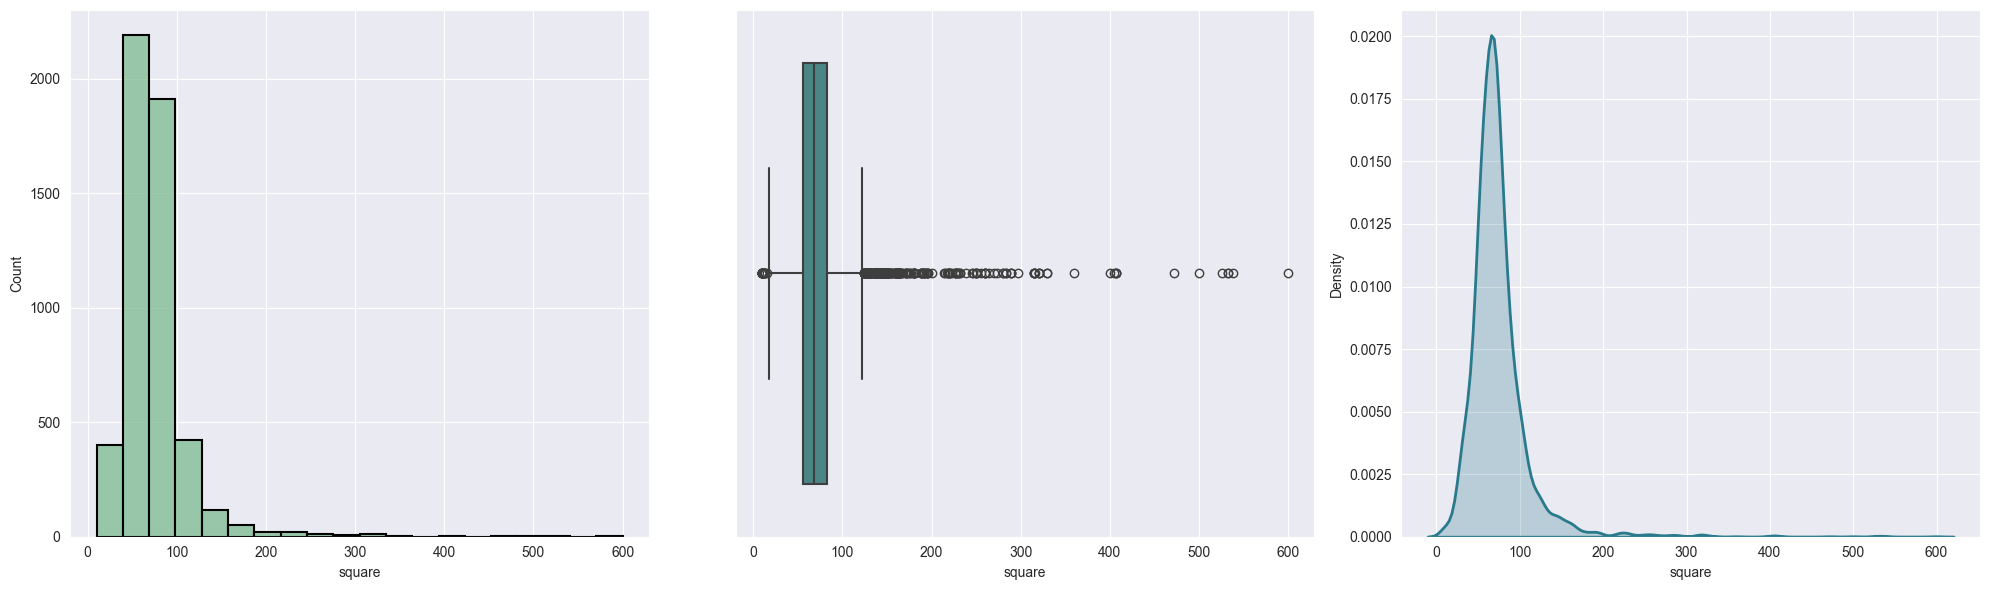

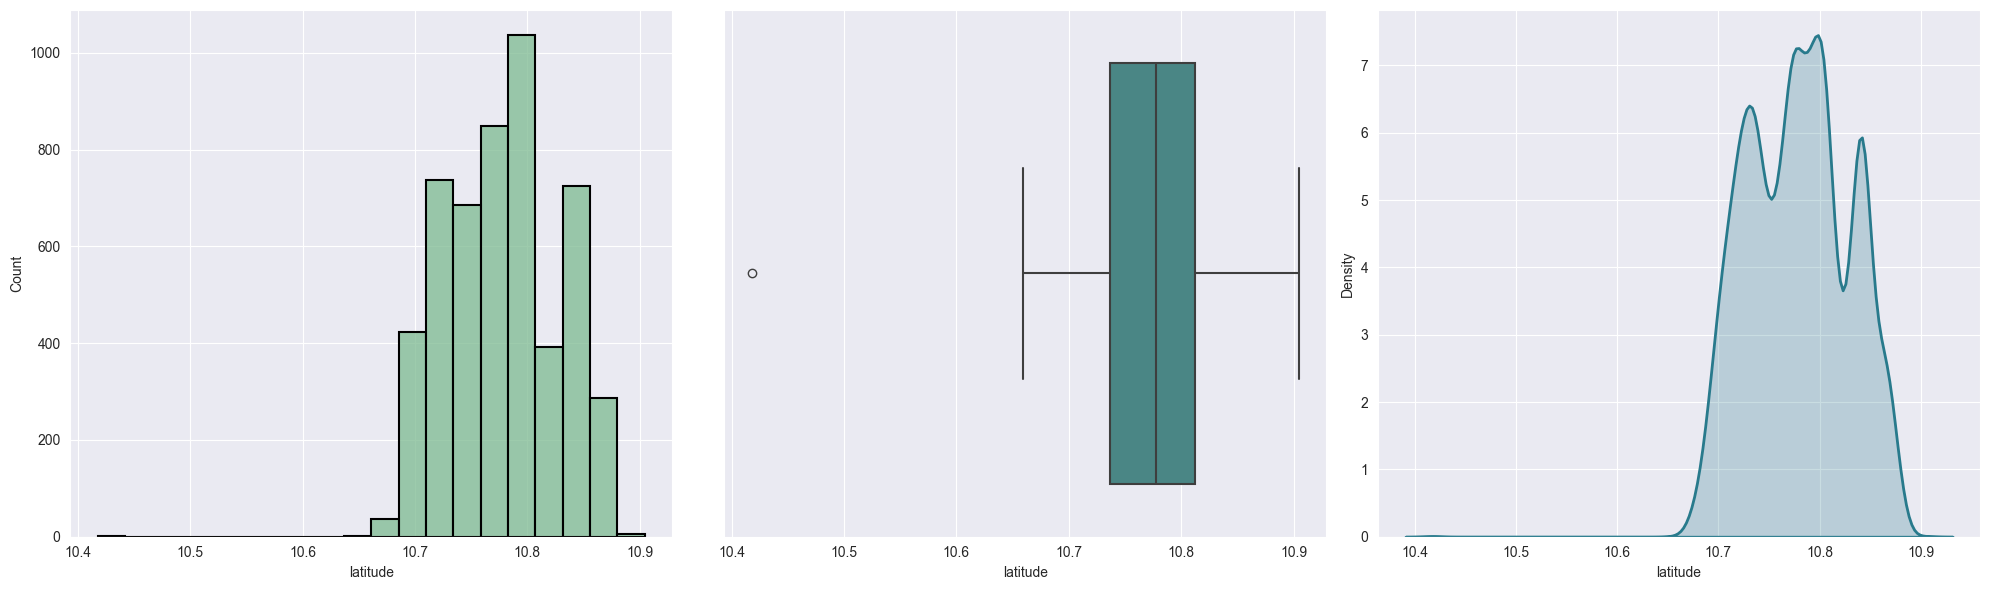

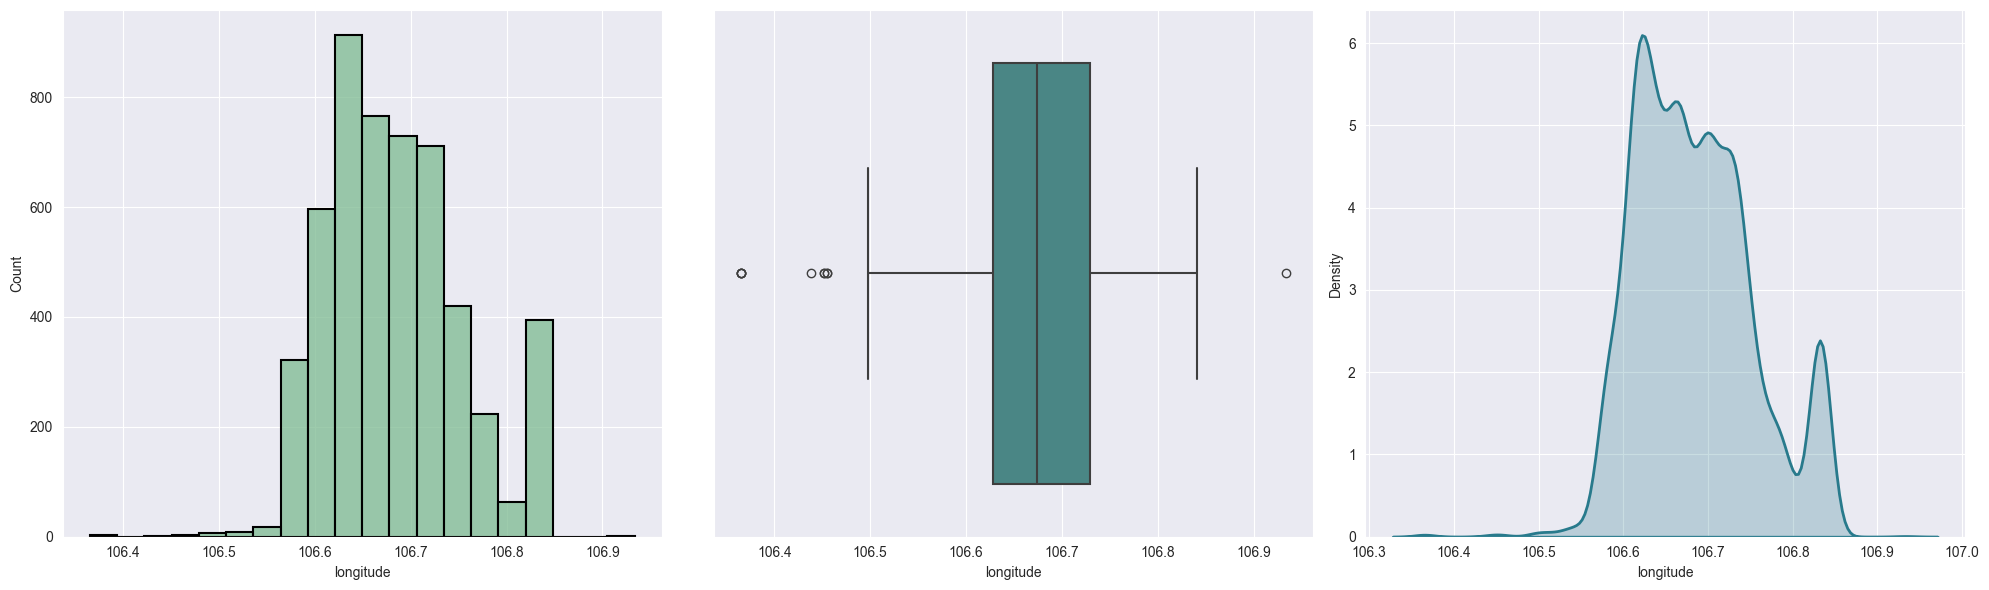

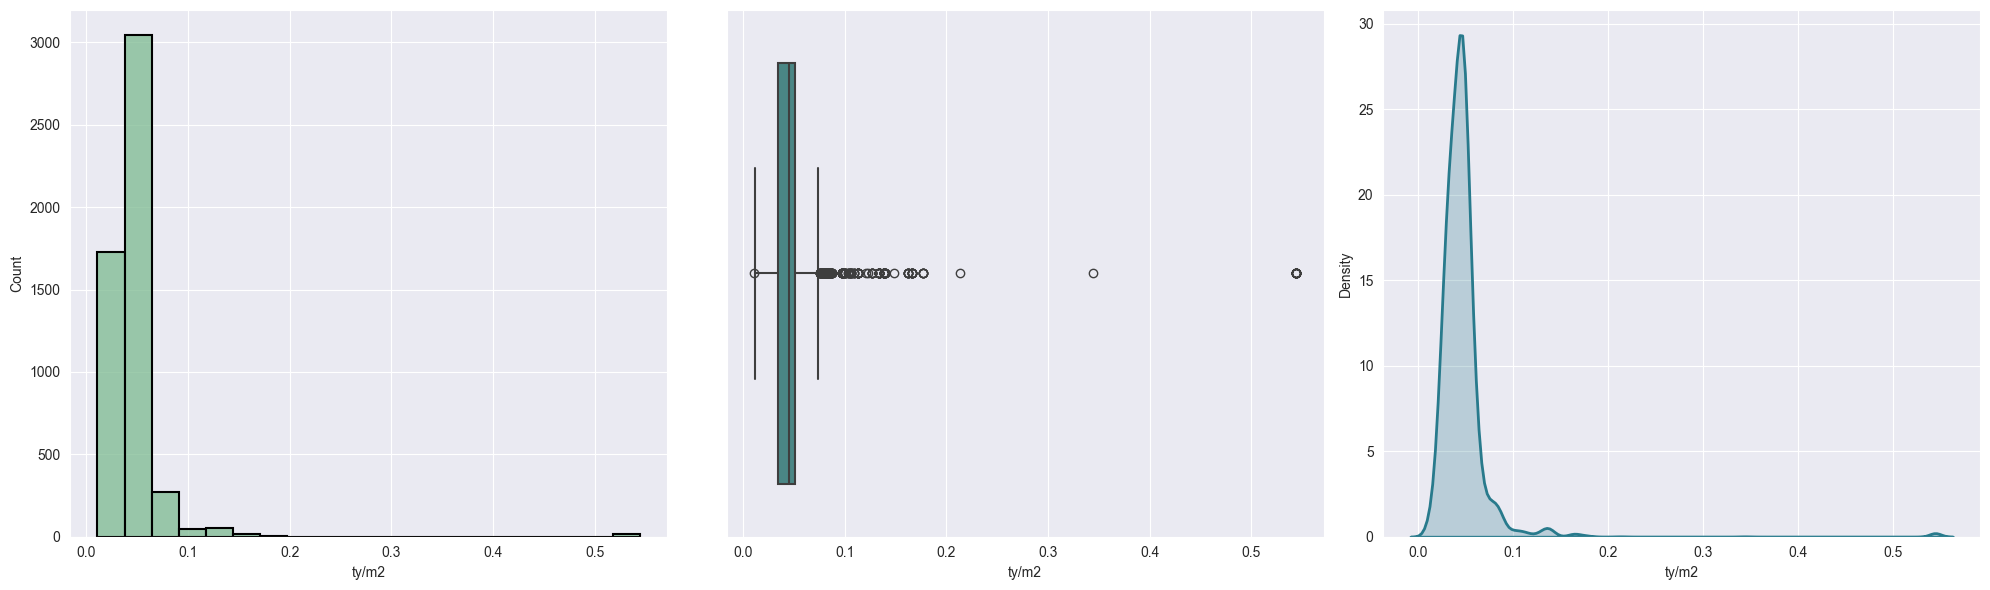

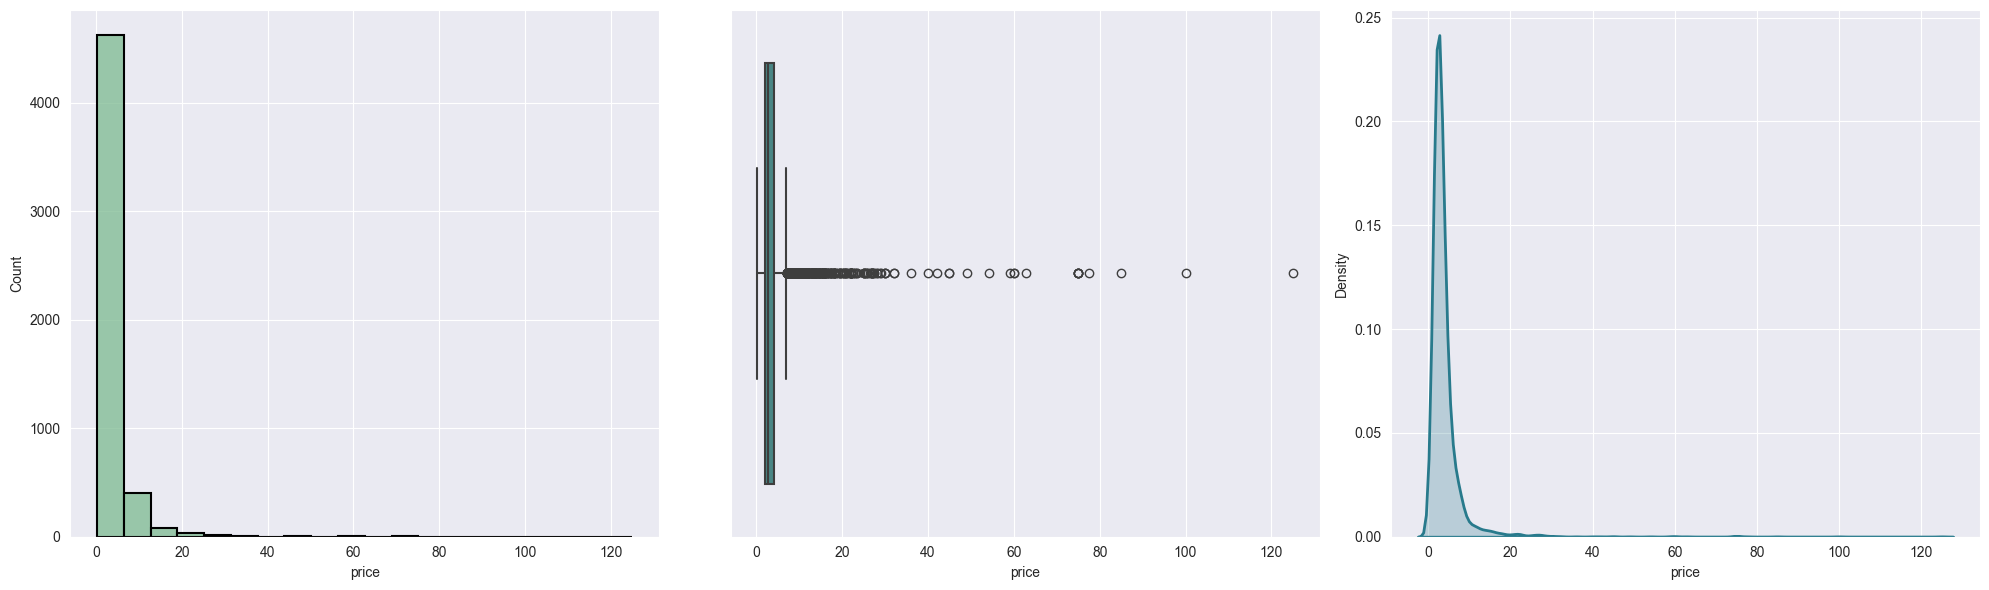

,Column,Skewness
0,square,4.72
1,latitude,-0.03
2,longitude,0.40
3,ty/m2,10.57
4,price,9.92


In [ ]:
columns = ['Column', 'Skewness']
distribution_info_list = []

for col in num_cols:
    skewness = plot_distribution(df[num_cols], col)
    distribution_info_list.append({'Column': col, 'Skewness': skewness})

distribution_info = pd.DataFrame(distribution_info_list)
distribution_info

Nhận xét:
+ Cột square có phân phối lệch phải rất lớn và số lượng ngoại lai rất nhiều. Đa số các chung cư/ căn hộ có diện tích nhỏ hơn 200m2. Các căn hộ/ chung cư có diện tích nhỏ hơn 100m2 phổ biến và được ưa chuộng.
+ Cột price có phân phối lệch phải rất lớn và có rất nhiều giá trị outlier. Giá của các căn hộ/ chung cư thường rơi vào dưới 20 tỷ. Chủ yếu nằm ở mức dưới 10 tỷ.
+ Cột ty/m2 cũng có phân phối lệch nhiều về phía bên phải và chiếm số lượng ngoại lệ lớn. Cho thấy giá trên m2 không quá 1 tỷ.
+ Các cột distance có phân phối lệch phải ở mức độ vừa phải
+ Cột longtitude có phân phối lệch phải và có số lượng outlier không đáng kể
+ Cột latitude có phân phối lệch trái và có số lượng outlier không đáng kể

=> Cần được chuẩn hóa và xử lý outliers


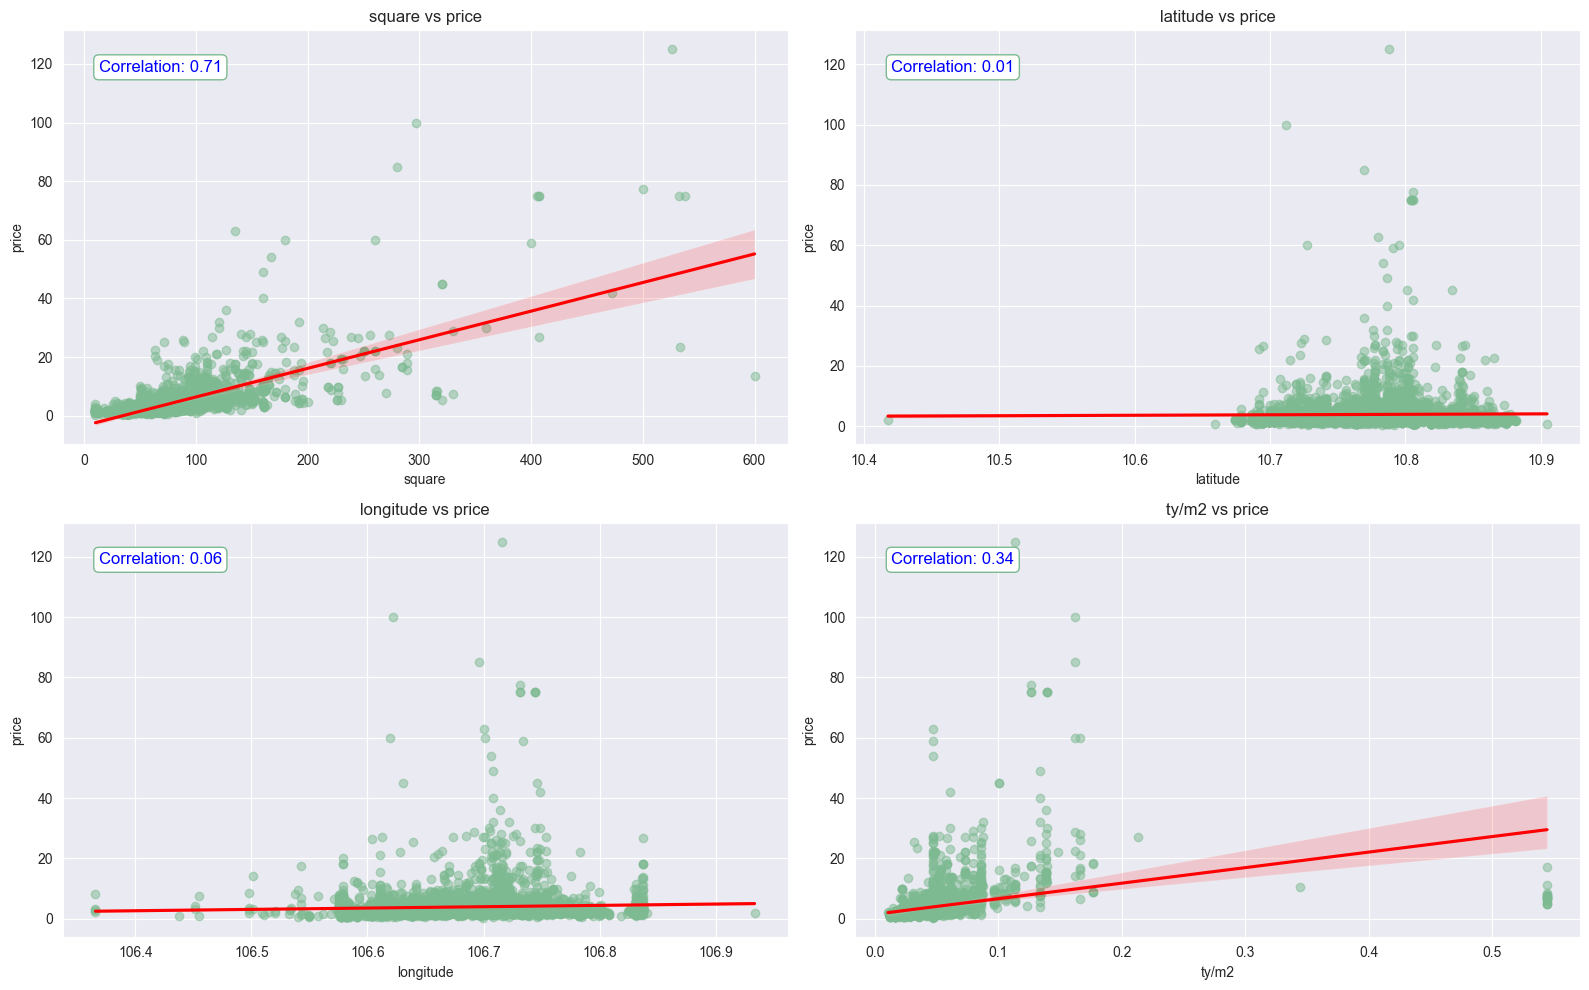

In [ ]:
def plot_multiple_scatters(data,cols, target_col):
    data = data[cols]
    # Exclude the target column from the features
    columns = [col for col in data.columns if col != target_col]

    # Calculate the number of rows and columns for the subplot grid
    num_cols = 2  # You can change this to any number of columns you prefer
    num_rows = int(np.ceil(len(columns) / num_cols))

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(16, num_rows * 5))
    axes = axes.flatten()  # Flatten in case of an uneven number of plots

    for i, x_column in enumerate(columns):
        correlation = data[x_column].corr(data[target_col])
        correlation_text = f"Correlation: {correlation:.2f}"
        palette = sns.color_palette("crest", as_cmap=False)
        # Plot scatterplot with regression line
        sns.regplot(x=x_column, y=target_col, data=data, ax=axes[i],
                    scatter_kws={'alpha': 0.5, 'color': palette[0]}, line_kws={'color': 'red'})

        # Annotate with correlation value
        axes[i].annotate(correlation_text,
                         xy=(0.05, 0.9),
                         xycoords='axes fraction',
                         fontsize=12, color='blue',
                         bbox=dict(boxstyle="round,pad=0.3", edgecolor=palette[0], facecolor='white'))

        # Set title for each subplot
        axes[i].set_title(f'{x_column} vs {target_col}')

    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()


plot_multiple_scatters(df,num_cols,'price')


Nhận xét:
+ Square đa phần dưới 200 m2 và có giá tập trung dưới 20 tỷ. Xu hướng chung cho thấy diện tích càng lớn thì giá càng cao. Mối quan hệ tương quan đạt mức 0.71, cho thấy đây là biến số có ảnh hưởng lớn nhất đến giá bán của một chung cư/ căn hộ.
+ Latitude và longtitude gần như không có mối tương quan tuyến tính với biến mục tiêu. 
+ ty/m2 có mối tương quan thấp với biến mục tiêu, có thể kết hợp với biến square để đưa ra giá tương đối ban đầu.

### Thêm biến dạng số

Nhìn sơ qua thì ta có thể thấy cột ty/m2 ( bao nhiêu tỷ trên 1 mét vuông) có độ tương quan không cao với biến mục tiêu là 'price' nhưng nếu phân tích sâu thì biến này có thể là một biến tiềm năng khi kết hợp với biến khác, ở đây là biến square. Ta sẽ kết hợp 2 biến này để tạo ra 1 biến mới là naive_price (giá dự đoán sơ khai) bằng cách nhân 2 biến này lại với nhau.

In [ ]:
df['naive_price'] = df['square'] * df['ty/m2']
# Correlation với biến mục tiêu
print(df['naive_price'].corr(df['price']))

0.831428070196385


In [ ]:
def plot_correlation_matrix(df, num_cols):
    num_cols.append('naive_price')
    df_num = df[num_cols]
    plt.figure(figsize=(10, 8))
    correlation_matrix = df_num.corr()
    variables = correlation_matrix.index.tolist()
    reordered = sorted(variables, key=lambda x: abs(correlation_matrix.loc['price', x]), reverse=True)
    reordered_corr = correlation_matrix.loc[reordered, reordered]
    # Tạo một colormap tùy chỉnh
    cmap = sns.color_palette("crest", as_cmap=True)

    # Đặt phạm vi giá trị cho các giá trị dương và âm riêng biệt
    sns.heatmap(reordered_corr, annot=True, vmin=0.1, vmax=1, cmap=cmap,
            cbar_kws={"shrink": .8}, linewidths=0.5, linecolor='white')

    plt.title('Correlation Matrix with Customized Color Range')
    plt.show()

Thêm biến distance_bins từ latitude và longitude

In [ ]:
# Hàm tính khoảng cách Haversine
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Bán kính trái đất tính bằng km
    phi1 = np.radians(lat1)
    phi2 = np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi / 2) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c  # Khoảng cách tính bằng km

q1 = [10.7753855, 106.6616251] # kinh độ vĩ độ của quận 1
# Tính khoảng cách và thêm cột 'distance' vào DataFrame
df['distance'] = df.apply(lambda row: haversine(row['latitude'], row['longitude'], q1[0], q1[1]), axis=1)
num_cols.append('distance')
df['distance_bins'] = pd.cut(df['distance'], bins=3, labels=["Low", "Medium", "High"])
df['distance_bins'].value_counts()

distance_bins
Low       4731
Medium     449
High         1
Name: count, dtype: int64

In [ ]:
# nối high vào medium vì high chỉ có 1 giá trị
df['distance_bins'] = df['distance_bins'].replace("High", "Medium")
mean_prices = df.groupby('distance_bins')['price'].mean()
print("Trung bình price cho mỗi nhóm distance:")
print(mean_prices)

Trung bình price cho mỗi nhóm distance:
distance_bins
Low       3.961172
Medium    3.164307
Name: price, dtype: float64


In [ ]:
def automatic_anova(df, category_col, value_col):
    # Tách các nhóm thành danh sách
    groups = [df[df[category_col] == group][value_col] for group in df[category_col].unique()]

    # Thực hiện kiểm tra ANOVA
    f_statistic, p_value = f_oneway(*groups)

    return f_statistic, p_value

f_stat, p_value = automatic_anova(df, 'distance_bins','price')

# Hiển thị kết quả
print("F-statistic:", f_stat)
print("p-value:", p_value)

F-statistic: 9.618926746639143
p-value: 0.0019361787048930207


Nhận xét: 

Kiểm định anova để xem xét mối tương quan giữa biến độc lập distance_bins và biến phụ thuộc price cho ra kết quả F-stastic đạt mức 9.62 và p-value nhỏ hơn 0.05 mang ý nghĩa thống kê. Vậy nên, có thể thấy biến distance_bins có giá trị phân loại

In [ ]:
cat_cols.append('distance_bins')

### Tương quan biến số

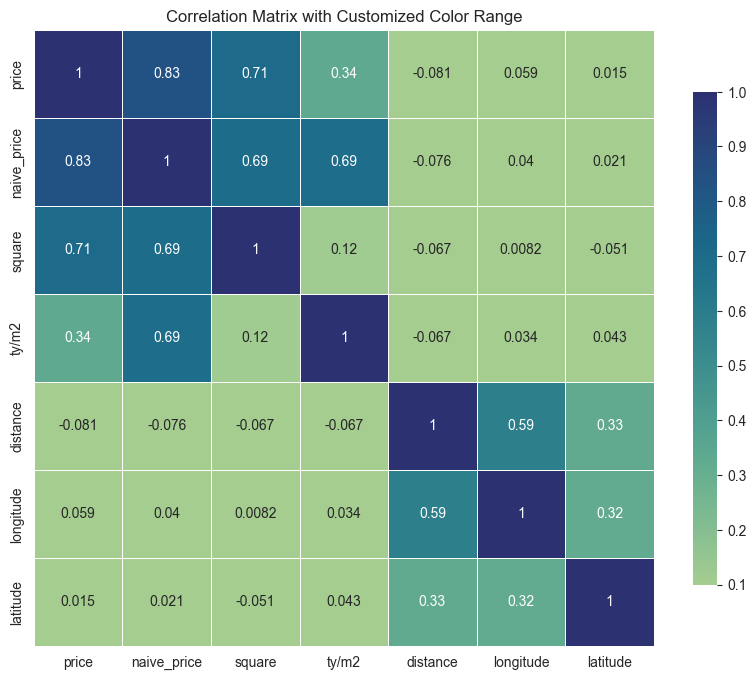

In [ ]:
plot_correlation_matrix(df, num_cols)

Nhận xét:
+ Bằng cách kết hợp 2 biến square và ty/m2 thu được biến naive_price, có độ tương quan ở mức 0.83 với biến mục tiêu. Điều này cho thấy biến naive_price là một biến có ảnh hưởng mạnh tới giá bán và có lợi cho mô hình học.
+ Biến naive_price và square có độ tương quan là 0.69- khá cao, tuy nhiên, chúng tôi lựa chọn mức 0.7 trở lên là độ tương quan cao nên không bỏ một trong 2 biến.
+ Các biến 'latitude' (0.015), 'longitude' (0.059), 'ty/m2' (0.34), 'distance' (-0.081) có độ tương quan tương đối thấp -> tiến hành loại bỏ

In [ ]:
to_remove = ['latitude', 'longitude', 'distance', 'ty/m2']
df.drop(columns=to_remove, inplace=True)

num_cols = [col for col in num_cols if col not in to_remove]

## 2.3. Biến phân loại

### Phân tích sơ bộ

In [ ]:
def visualize_info_cat_col(df, col):
    # Tạo 2 biểu đồ trên cùng một hàng
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))  # 1 hàng, 2 cột

    # Biểu đồ Countplot
    sns.countplot(x=col, data=df, palette="crest", order=df[col].value_counts().index, ax=axes[0])
    axes[0].set_title(f"Phân bố của biến '{col}'")
    axes[0].tick_params(axis='x', rotation=45 if len(df[col].unique()) > 5 else 0)

    # Biểu đồ Boxplot
    sns.boxplot(x=col, y='price', data=df, palette="Set2", order=df[col].value_counts().index, ax=axes[1])
    axes[1].set_title(f"Boxplot của '{col}' theo 'price'")
    axes[1].tick_params(axis='x', rotation=45 if len(df[col].unique()) > 5 else 0)

    # Căn chỉnh layout
    plt.tight_layout()
    plt.show()

In [ ]:
def print_info_cat_col(df, cols):
  set = {}
  for col in cols:
    info_list = []
    print('Kiểm tra thông tin của biến', col)

    for value, num in df[col].value_counts().items():
        mean_price = df[df[col] == value]['price'].mean()
        #print(mean_price)
        #, 'mean_price': round(mean_price, 4)
        info_list.append({'val_name':value, 'num':num, 'num_per': round(num/len(df[col]),4)*100, 'mean_price': round(mean_price, 4)})

    df_info = pd.DataFrame(info_list).sort_values(by=['num_per'], ascending=False)
    display(df_info)
    set[col] = df_info
    visualize_info_cat_col(df, col)
  return set

Kiểm tra thông tin của biến property-status


,val_name,num,num_per,mean_price
0,Đã bàn giao,4097,79.08,4.007
1,Chưa bàn giao,1084,20.92,3.457


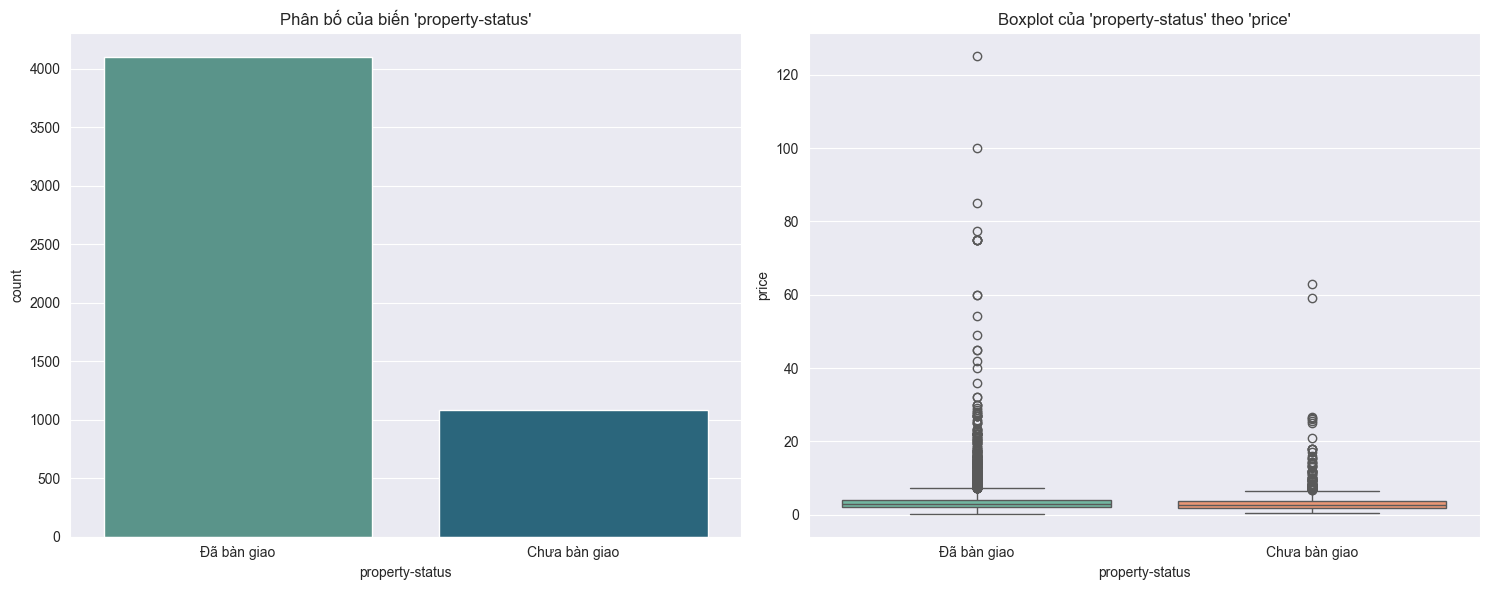

Kiểm tra thông tin của biến apartment-type


,val_name,num,num_per,mean_price
0,Chung cư,4883,94.25,3.6052
1,Officetel,116,2.24,2.3563
2,Duplex,70,1.35,8.4376
3,Penthouse,67,1.29,23.2893
4,"Căn hộ dịch vụ, mini",26,0.50,2.8692
5,"Tập thể, cư xá",19,0.37,3.2254


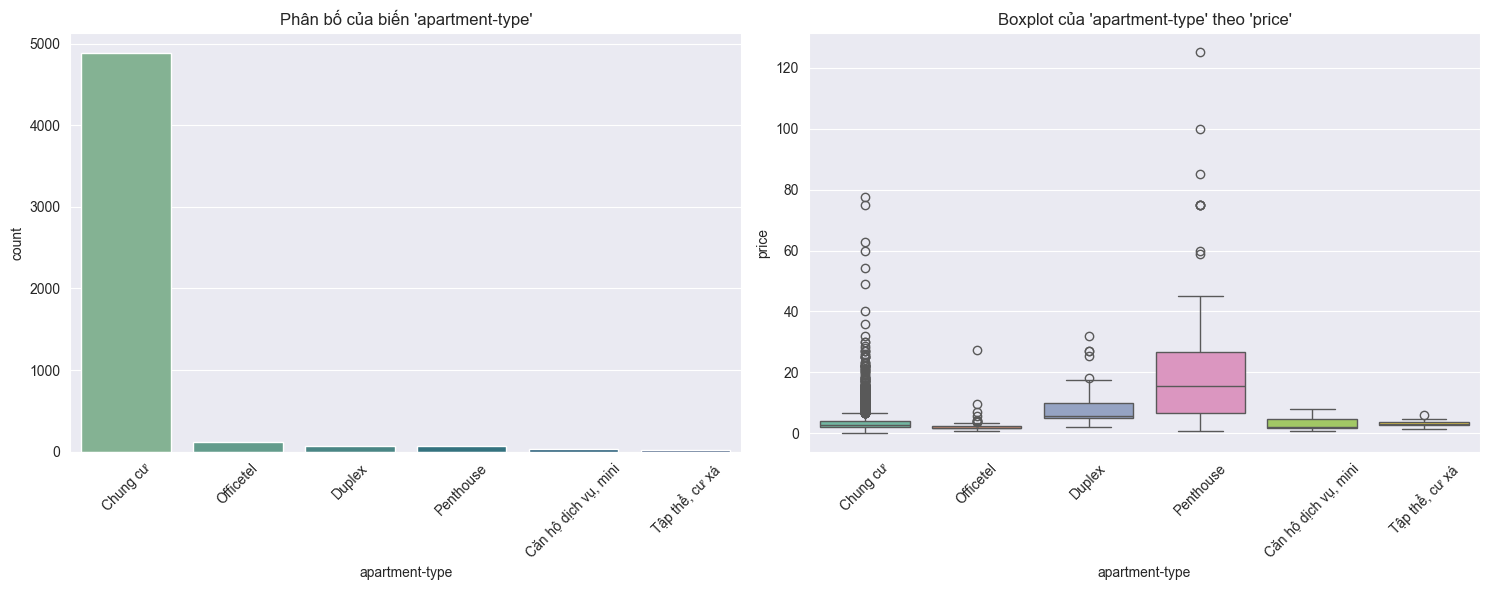

Kiểm tra thông tin của biến legal-documents


,val_name,num,num_per,mean_price
0,Sổ hồng riêng,2601,50.20,3.9500
1,Hợp đồng mua bán,1968,37.98,3.8119
2,Đang chờ sổ,480,9.26,3.8720
3,Hợp đồng đặt cọc,132,2.55,4.0133


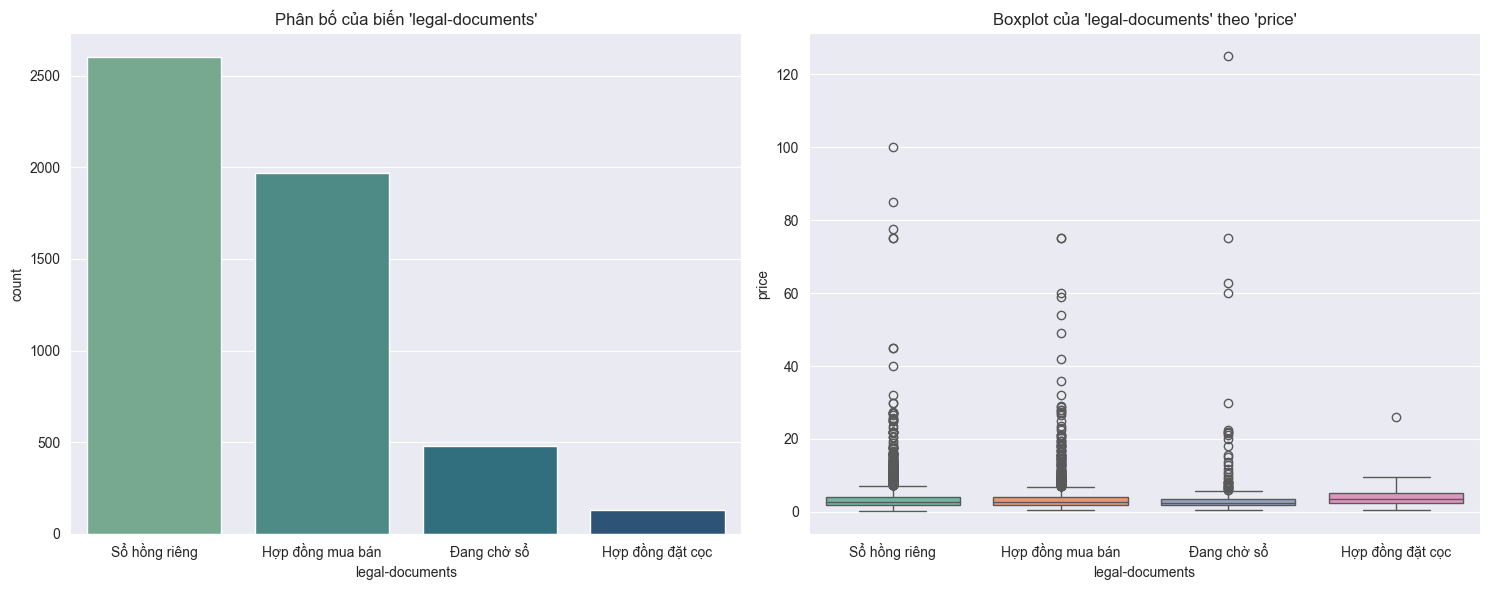

Kiểm tra thông tin của biến interior-status


,val_name,num,num_per,mean_price
0,Bàn giao thô,1985,38.31,3.6873
1,Nội thất đầy đủ,1279,24.69,3.5485
2,Hoàn thiện cơ bản,1203,23.22,3.4357
3,Nội thất cao cấp,714,13.78,5.8449


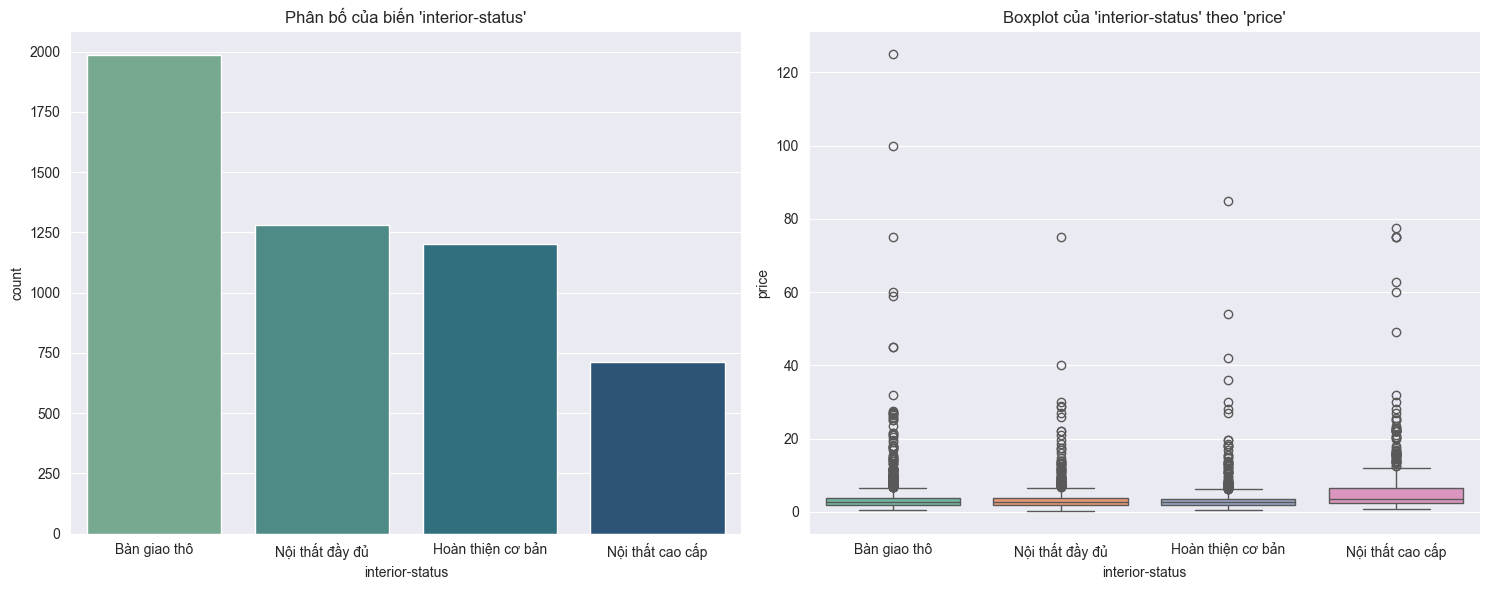

Kiểm tra thông tin của biến ownership_status


,val_name,num,num_per,mean_price
0,Môi Giới,4039,77.96,3.8857
1,Cá nhân,1088,21.00,3.5886
2,Chuyên trang môi giới,54,1.04,10.4714


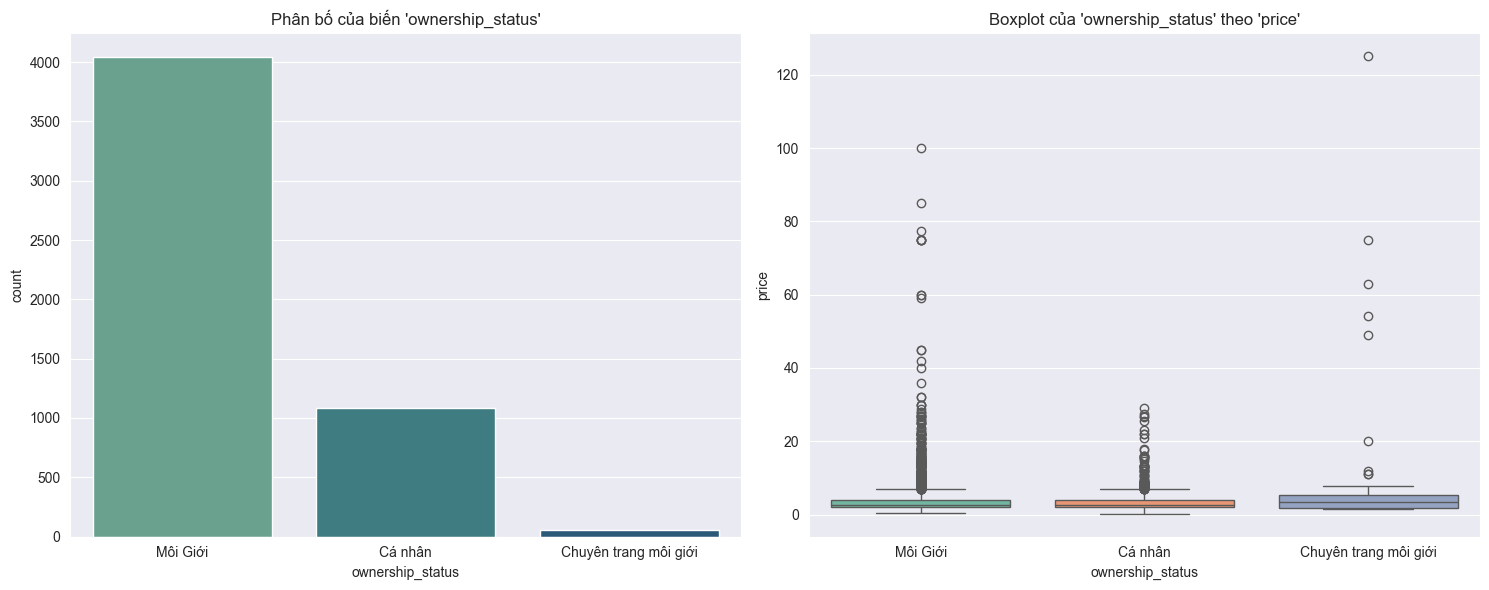

Kiểm tra thông tin của biến district


,val_name,num,num_per,mean_price
0,Quận 9,561,10.83,2.9517
1,Quận 7,538,10.38,3.9329
2,Quận Tân Phú,499,9.63,3.8722
3,Quận 2 cũ,440,8.49,8.3010
4,Quận 8,419,8.09,2.4655
5,Quận Bình Tân,356,6.87,2.4136
6,Huyện Bình Chánh,352,6.79,2.1836
7,Quận 12,272,5.25,2.1958
8,Thành phố Thủ Đức,265,5.11,2.6314
9,Quận Bình Thạnh,234,4.52,6.9837


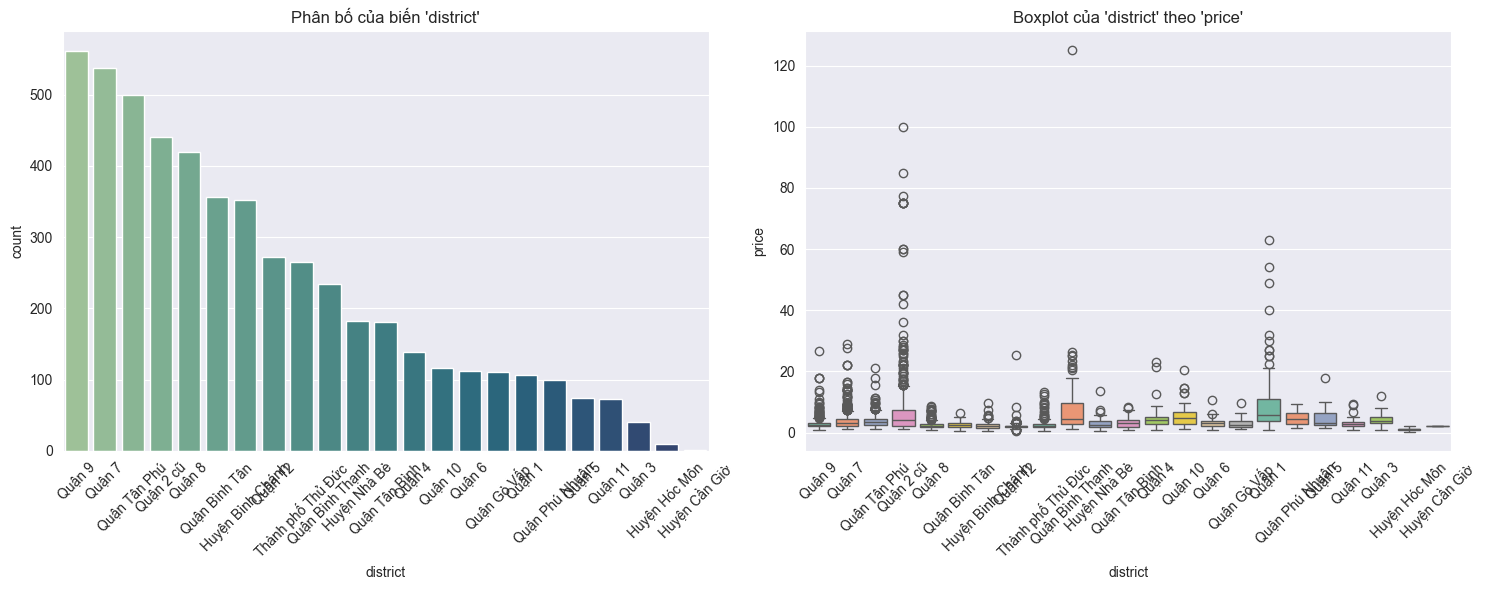

Kiểm tra thông tin của biến number-of-bedrooms


,val_name,num,num_per,mean_price
0,2.0,3273,63.17,3.1237
1,3.0,993,19.17,6.1469
2,1.0,806,15.56,2.2821
3,4.0,90,1.74,18.3276
4,5.0,19,0.37,18.2910


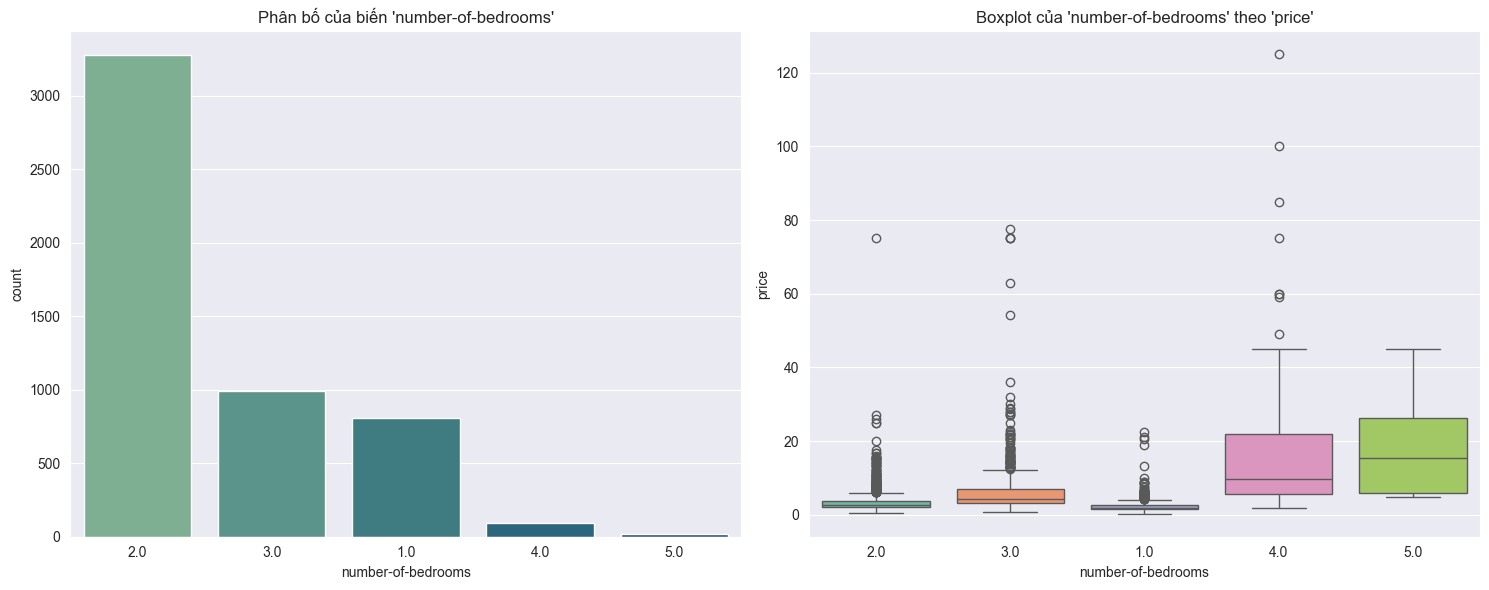

Kiểm tra thông tin của biến number-of-bathrooms


,val_name,num,num_per,mean_price
0,2.0,3418,65.97,3.6227
1,1.0,1362,26.29,2.3589
2,3.0,331,6.39,9.8392
3,4.0,57,1.10,18.5429
4,5.0,13,0.25,19.6446


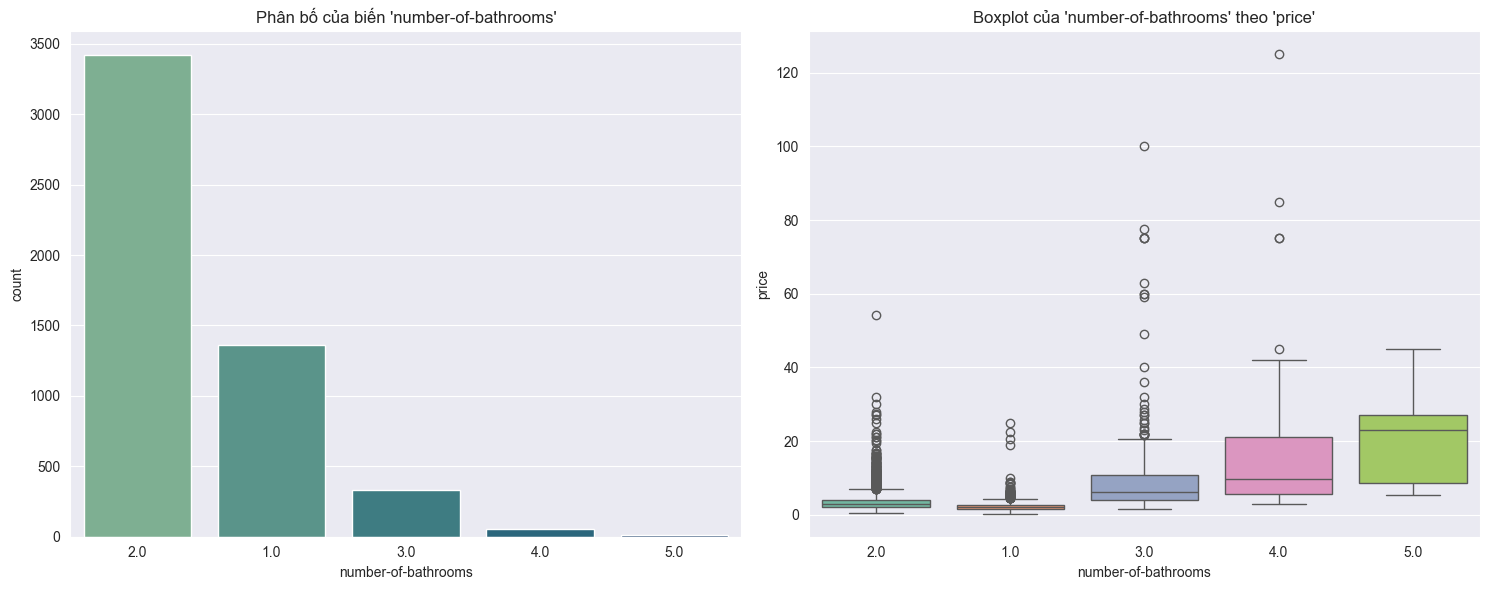

Kiểm tra thông tin của biến view


,val_name,num,num_per,mean_price
0,0.0,3042,58.71,3.4169
1,0.5,1856,35.82,4.2778
2,1.0,283,5.46,6.4681


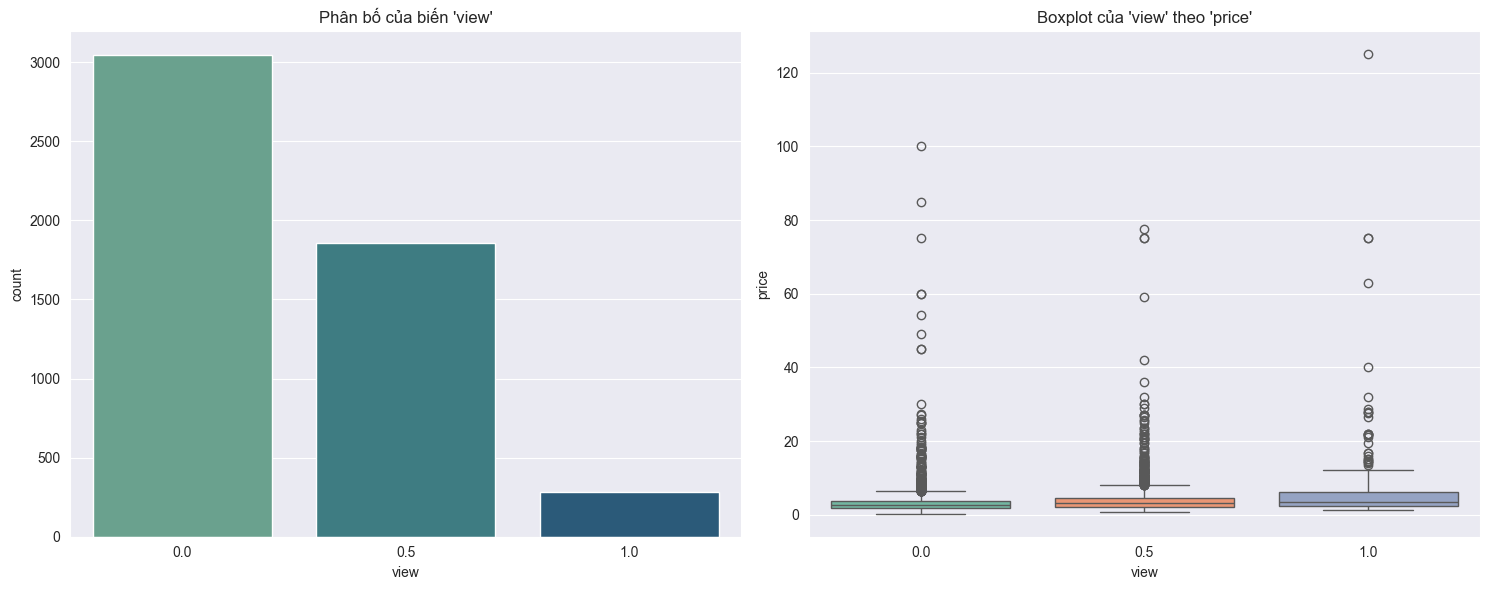

Kiểm tra thông tin của biến corner_apartment


,val_name,num,num_per,mean_price
0,0,3982,76.86,3.7275
1,1,1199,23.14,4.4382


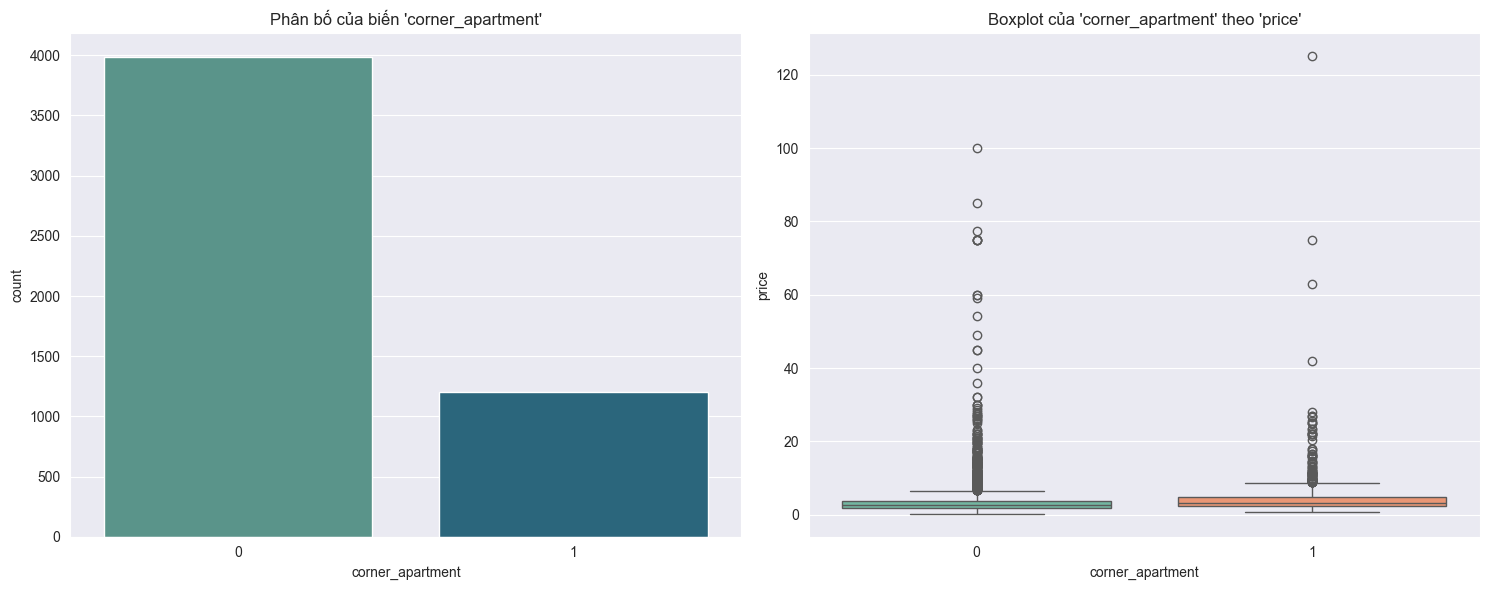

Kiểm tra thông tin của biến distance_bins


,val_name,num,num_per,mean_price
0,Low,4731,91.31,3.9612
1,Medium,450,8.69,3.1643


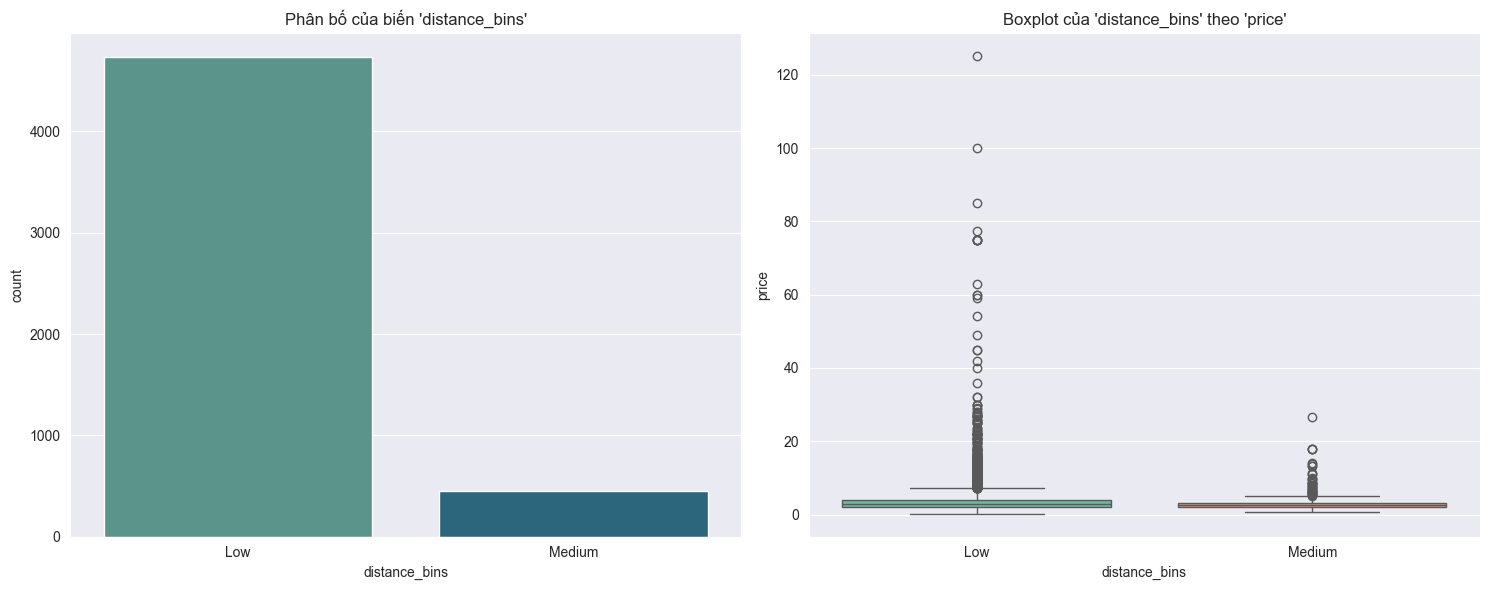

In [ ]:
info_cat_col = print_info_cat_col(df, cat_cols)

Nhận xét:
+ Cột Property-status, số lượng ngôi nhà ở trạng thái đã bàn giao chiếm tỷ lệ 4:1 so với số lượng ngôi nhà ở trạng thái Chưa bàn giao. Đồng thời giá trung bình của biến này cũng cao hơn biến còn lại- Chưa bàn giao. Cột property-staus có hộp hẹp, cho thấy các giá trị tập trung trong khoảng giá từ 0 đến 10. Cả hai giá tị Đã bàn giao và Chưa bàn giao đều có số lượng ngoại lệ lớn, đặc biệt giá trị Đã bàn giao có ngoại lệ đa dạng và trải dài.

+ Cột Apartment-type cho thấy Chung cư được bán với số lượng áp đảo là gần 4900 lượt rao bán trên tổng 5181 dữ liệu thu thập. Tuy biến Chung cư có số lượng áp đảo là thế nhưng giá trung bình ở mức thấp, chỉ hơn 3.6 tỷ. Ngược lại giá trị Penhouse chỉ chiếm số lượng là 67 mẫu với tỷ lệ là 1.29% nhưng lại có giá trung bình cao nhất, vượt xa so với các giá trị còn lại là 23.2893, điều này cho thấy giá của Penhouse rất cao. Quan sát biểu đồ boxplot cũng cho thấy khoảng giá trị của Penhouse được trải dài nhất.Cột apartment-type có giá trị Chung cư, Officetel, Duplex, Căn hộ dịch vụ, mini, Tập thể, cư xá có hộp hẹp cho thấy các giá trị tập trung trong khoảng giá từ 0 đến 10. Các cột Chung cư, Officetel, Penthouse, Duplex và Tập thể, cư xá đều có ngoại lệ, trong đó Giá trị Chung cư có lượng ngoại lệ nhiều nhất.


+ Cột legal-documents, số lượng sổ hồng chiếm hơn 1/2 trên tổng các loại giấy tờ, theo sau lần lượt là Hợp đồng mua bán, Đang chờ sổ và hợp đồng đặt cọc. Chú ý là giá trị Hợp đồng đặt cọc tuy có số lượng thấp nhất là 132 mẫu, chiếm 2.55% nhưng có giá trung bình cao nhất là 4.0133. Kết hợp với biểu đồ cho thấy giá bán khi chọn Hợp đồng đặt cọc là rất ổn định và mức giá trung bình cao. Biểu đồ cho thấy cả 4 giá trị: Hợp đồng mua bán, Đang chờ sổ, Sổ hồng riêng, Hợp đồng đặt cọc đều có hộp hẹp cho thấy các giá trị tập trung trong khoảng giá từ 0 đến 10 triệu. Cả 4 giá trị đều có ngoại lệ, phần lớn là các cột Hợp đồng mua bán, Đang chờ sổ, Sổ hồng riêng

+ Cột interior-status, số lượng chung cư/ căn hộ được bàn giao thô chiếm số lượng cao nhất, gần 2000 mẫu, trong khi đó số lượng chung cư/ căn hộ có nội thất cao cấp nhỏ, chiếm 714 mẫu với tỷ lệ 13.78%, tuy nhiên lại có giá trung bình cao nhất là 5.8449 tỷ, trong khi 3 giá trị còn lại có mức giá trung bình dao động ở mức 3.5 tỷ. Điều này cho thấy nhà có Nội thất cao cấp có giá cao vượt trội hơn so với 3 loại còn lại.
Cột interior-status có cả 4 giá trị: Bàn giao thô, Nội thất cao cấp, Hoàn thiện cơ bản và Nội thất đầy đủ đều có hộp hẹp cho thấy các giá trị tập trung trong khoảng giá từ 0 đến 10 triệu. Cả 4 giá trị đều có số lượng ngoại lệ lớn


+ Cột ownership_status, chung cư/ căn hộ được bán bởi môi giới chiếm tỷ lệ 4:1 so với chính chủ. Tuy nhiên, giá trị Chuyên trang môi giới chỉ chiếm 54 mẫu, chiếm tỷ lệ 1.04% nhưng lại có giá trị trung bình cao vượt trội là 10.4714, kết hợp với biểu đồ thấy rằng Giá nhà được bán bởi Chuyên trnag môi giới có giá cao và khá ổn định. Cột ownership_status có cả 3 giá trị: Môi giới, Cá nhân và Chuyên trang môi giới đều có hộp hẹp cho thấy các giá trị tập trung trong khoảng giá từ 0 đến 10 triệu. Cả 3 giá trị đều có số lượng ngoại lệ lớn, giá trị Môi Giới có lượng ngoại lệ nhiều nhất.

+ Cột district, số lượng mẫu được thu thập phân bố không đồng đều, giàm dần từ quận 9, quận 7, ... huyện cần giờ. Tuy nhiên, giá trung bình không tuân theo quy luật giảm dần như được quan sát ở cột số lượng, ví dụ như giá trị Quận 2 cũ chiếm 8.09% trên tổng số lượng mẫu và có giá trung bình là 8.301 tỷ, hay giá trị Quận Bình Thạnh chiếm 4.52% tổng số mẫu nhưng có giá trung bình gần 7 tỷ. Điều này cho thấy giá bán ở các quận tương đối khác biệt. Giá trung bình ở các giá trị còn lại dao động trong khoảng [2.1, 3.9] tỷ. Cột district có các biến có giá dao động trong khoảng từ 0 đến 15. Giá trị Quận Bình Thạch, quận 6, quận 11, quận 10 có giá trị median gần nằm giữa hộp cho thấy có phân phối gần với phân phối chuẩn. Hầu hết tất cả các giá trị đều có ngoại lệ trừ giá trị Huyện Hóc Môn và Huyện Cần Giờ.
+ Number-of-bedrooms có các giá trị giảm dần lần lượt là 2, 3, 1, 4 và 5. Trong đó, giá trị 2 chiếm tỷ lệ 63.17% trên tổng số mẫu, đối với giá trị 4 và 5 chỉ chiếm ~2% trên tổng số mẫu. Bên cạnh đó, kết hợp biểu đồ và bảng thông tin, giá trung bình cho thấy rằng chung cư/ căn hộ càng có nhiều giường ngủ thì giá càng cao, và với giường ngủ là 4 và 5, giá trung bình > 18 tỷ. Cột number-of-bedrooms có các giá trị: 1, 2 và 3 có hộp hẹp cho thấy các giá trị có khoảng giá nằm trong khoảng từ 0 đến 10. Với giá trị 4 và 5 có khoảng giá nằm trong khoảng 0 đến 22. Các giá trị 1, 2, 3, và 4 đều có ngoại lệ.

+ Cột number-of-bathrooms có có các giá trị giảm dần lần lượt là 2, 1, 3, 4 và 5. Số lượng phân bố ở các giá trị gần tương tự như biến number-of-bedrooms: giá trị 2 chiếm tỷ lệ 65.97% trên tổng số mẫu, đối với giá trị 4 và 5 chỉ chiếm ~2% trên tổng số mẫu. Bên cạnh đó, kết hợp biểu đồ và bảng thông tin, giá trung bình cho thấy rằng chung cư/ căn hộ càng có nhiều giường ngủ thì giá càng cao, và với giường ngủ là 4 và 5, giá trung bình > 18 tỷ. Cột number-of-bathrooms có các giá trị 1, 2, 3 có hộp hẹp cho thấy các giá trị có khoảng giá nằm trong khoảng từ 0 đến 10. Với giá trị 4 và 5 có khoảng giá nằm trong khoảng 0 đến 22. Các giá trị 1, 2, 3, và 4 đều có ngoại lệ

+ View cho thấy hơn 1 nửa các chung cư/ căn hộ là không có view, còn lại là có view và view nhìn ra sông Sài Gòn. Đặc biệt những chung cư/ căn hộ có view nhìn ra sông Sài Gòn (giá trị là 1) có giá trung bình cao hơn những căn hộ và chung cư còn lại, với giá ~6.5 tỷ. Cột view có cả 3 giá trị: 0, 0.5 và 1 đều có hộp hẹp cho thấy các giá trị tập trung trong khoảng giá từ 0 đến 10 triệu. Cả 3 giá trị đều có số lượng ngoại lệ lớn

+ Corner-apartment, chung cư/ căn hộ không phải là căn góc chiếm số lượng áp đảo với tỷ lệ gần 4:1 so với các chung cư/ căn hộ ở góc. Tuy nhiên chung cư/ căn hộ căn góc lại có giá trung bình cao hơn với một khoảng tương đối. Cột corner_apartment giá trị: 0 và 1đều có hộp hẹp cho thấy các giá trị tập trung trong khoảng giá từ 0 đến 10 triệu. Cả 2 giá trị đều có số lượng ngoại lệ lớn
+ Cột distance_bins nhằm xác định chung cư/ căn hộ có vị trí tương quan như thế nào với trung tâm quận 1, cho thấy có nhiều chung cư/ căn hộ ở gần trung tâm. Quan sát biểu đồ cho thấy giá của các chung cư/ căn hộ ở gần trung tâm quận 1 dao động rất mạnh mẽ, đồng thời ta thấy được xu hướng ngược lại ở các chung cư/ căn hộ có khoảng cách vừa so với quận 1.

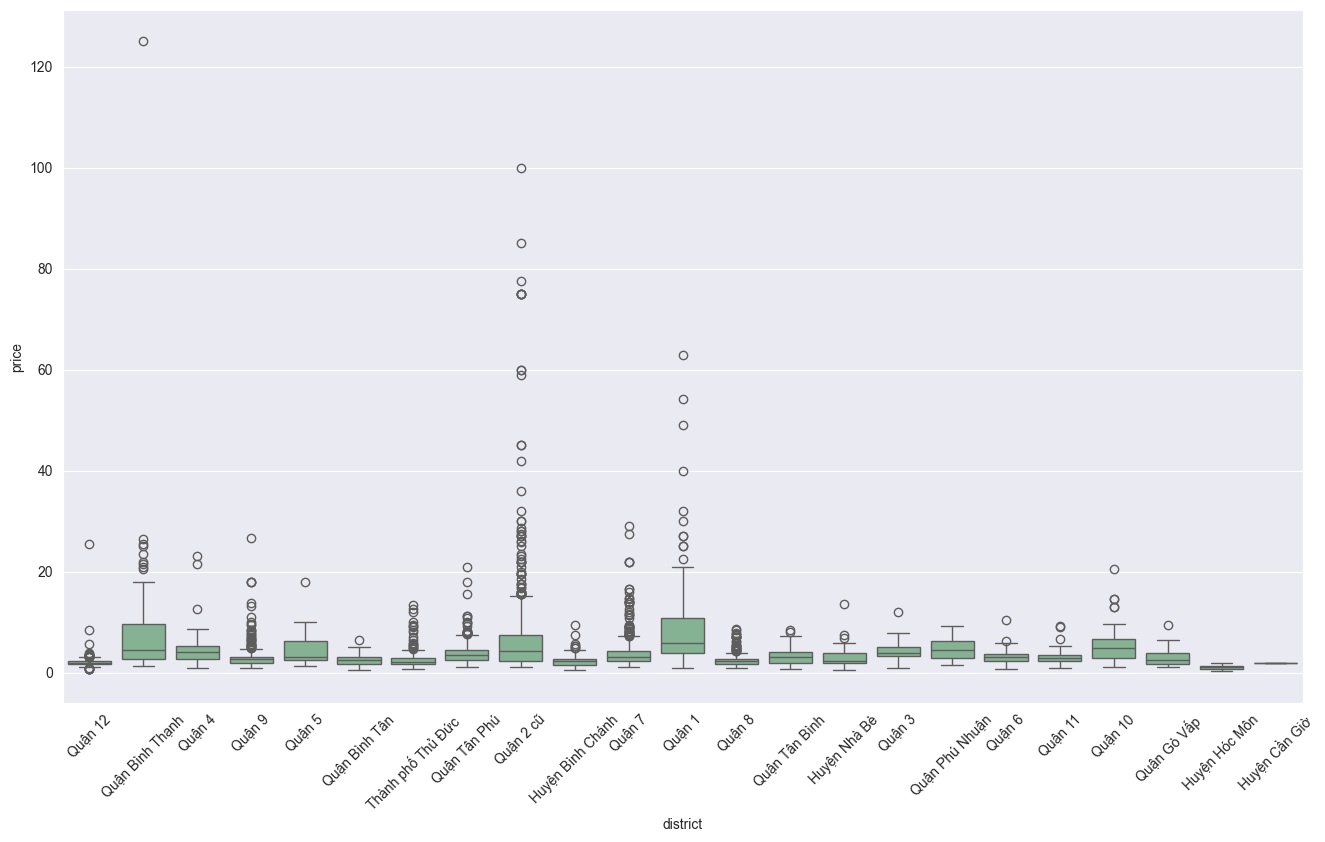

In [ ]:
fig = plt.figure(figsize = (16, 9))
sns.boxplot(x=df['district'], y=df['price'], color=palette[0])
plt.xticks(rotation=45)
plt.show()

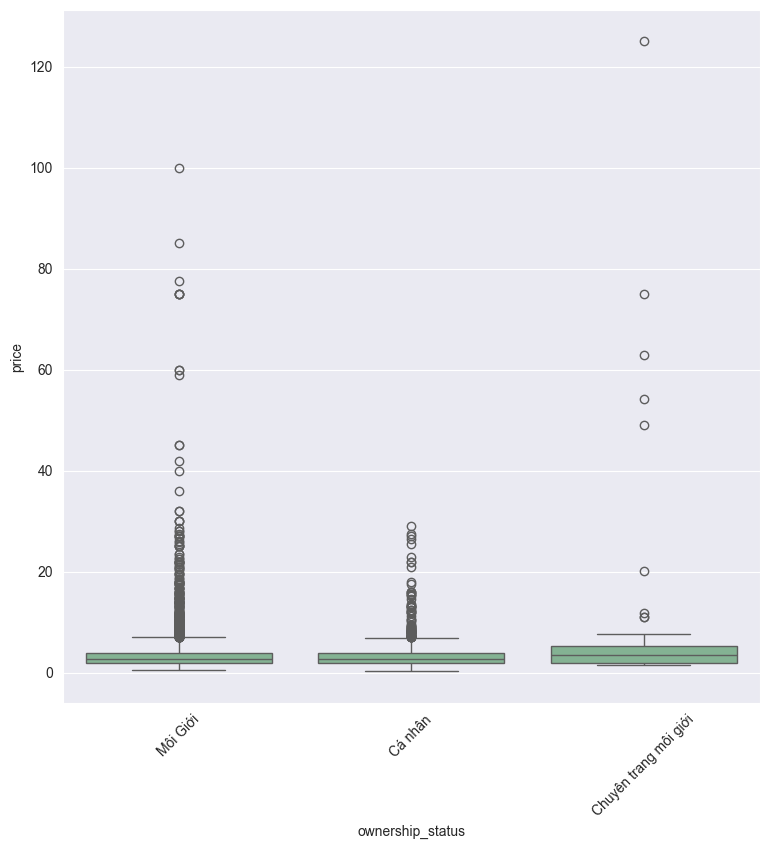

In [ ]:
fig = plt.figure(figsize = (9, 9))
sns.boxplot(x=df['ownership_status'], y=df['price'], color=palette[0])
plt.xticks(rotation=45)
plt.show()

**Nhận xét về giá bán tại các quận:**
 
+ Tổng quan: giá bán ở một số quận không có khả năng phân loại. Ví dụ như giá bán ở Quận Bình Thạch phủ luôn cả giá bán tại quận 4, quận 5, ... 
+ Đa phần giá bán ở từng quận đều có ngoại lệ. Đồng thời, giá bán tại các quận đều có xu hướng lệch phải (tức giá cao dao động rất nhiều)
+ Quận Tân Phú có số lượng ngoại lệ nhiều nhất và trải dài nhất. Cho thấy giá bán tại quận này dao động phức tạp. Sau đó là các quận 1, Bình Chánh.
+ Một số quận như Huyện Cần Giờ, Huyện Hóc Môn, Quận Gò Vấp, Quận, Quận Bình Tân là những quận có mức giá bán chung cư/ căn hộ rất phải chăng và ổn định. Phù hợp với những người có mức thu nhập vừa phải, và cũng không lo lắng nhiều về việc bị ép giá.
+ Giá ở các quận Bình Tạch, Quận Tân Phú, Quận 1, Quận 2 cũ có mức giá cao, vì nằm gần trung tâm thành phố. 



**Nhận xét về giá bán tại dựa trên tình trạng sở hữu (ownership_status):**

+ Với tình trạng sở hữu là Môi giới, có số lượng ngoại lệ nhiều nhất cho thấy giá bán với tình trạng này là bất ổn nhất, thậm chí có giá nhà bán qua tay môi giới lên tới 100 tỷ. Lý giải cho nguyên nhân này có thể là do khi giá nhà cần bán qua tay người môi giới thường đẩy cao, do sự quyết định của người môi giới giữa người cần bán và người cần mua
+ Với tình trạng sở hữu là Cá nhân, số lượng ngoại lệ lớn nhiều thứ hai. Tuy nhiên, giá cả bán ra ở tình trạng này chỉ nằm dưới mức 35 tỷ.
+ Với tình trạng là Chuyên trang môi giới, tuy có ít lượng ngoại lai, nhưng ngoại lai cũng tương đối khác biệt. Có giá nhà bán lên tới 80 tỷ. Cho thấy có sự ổn định hơn về giá bán khi đi qua trang môi giới, hơn là qua tay Môi giới.

### Tính anova để chọn thuộc tính

In [ ]:
def filter_significant_categorical(df, cat_cols ,significance_level=0.05):
  anova_info_list = []
  for col in cat_cols:
      f_statistic, p_value = automatic_anova(df, col, 'price')
      anova_info_list.append({'col': col, 'f_sta': f_statistic, 'p_val': p_value})

  anova_info = pd.DataFrame(anova_info_list)
  # Filter the DataFrame for significant ANOVA results
  significant_anova = anova_info[anova_info['p_val'] < significance_level].sort_values(by=['f_sta'], ascending=False)
  return significant_anova


significant_categorical = filter_significant_categorical(df, cat_cols=cat_cols,significance_level=0.5)
significant_categorical

,col,f_sta,p_val
6,number-of-bedrooms,377.134641,1.992912e-285
7,number-of-bathrooms,359.736320,1.112928e-273
1,apartment-type,249.810072,9.281438e-240
8,view,53.333888,1.182326e-23
4,ownership_status,45.633505,2.260755e-20
3,interior-status,40.242409,1.063825e-25
5,district,38.327302,2.914145e-151
9,corner_apartment,17.182247,3.450183e-05
10,distance_bins,9.618927,1.936179e-03
0,property-status,9.558469,2.000870e-03


Nhận xét:
+ Đa phần các nhóm trong mỗi biến phân loại đều có khác biệt -> có ảnh hưởng đến biến phụ thuộc
+ Biến legal-documents là không cho thấy sự khác biệt (p_value > 0.05) -> Tiến hàng loại bỏ.
+ Các cột có giá trị f_sta chêch lệch lớn, trong khoảng [9.5585, 377.1364]
+ Kiểm định các giá trị p_value thấp hơn 0.05 cho thấy kiểm định có ý nghĩa thống kê.

In [ ]:
df.drop(columns=['legal-documents'], inplace=True)
cat_cols.remove('legal-documents')

## 2.4 Trực quan giữa các biến độc lập

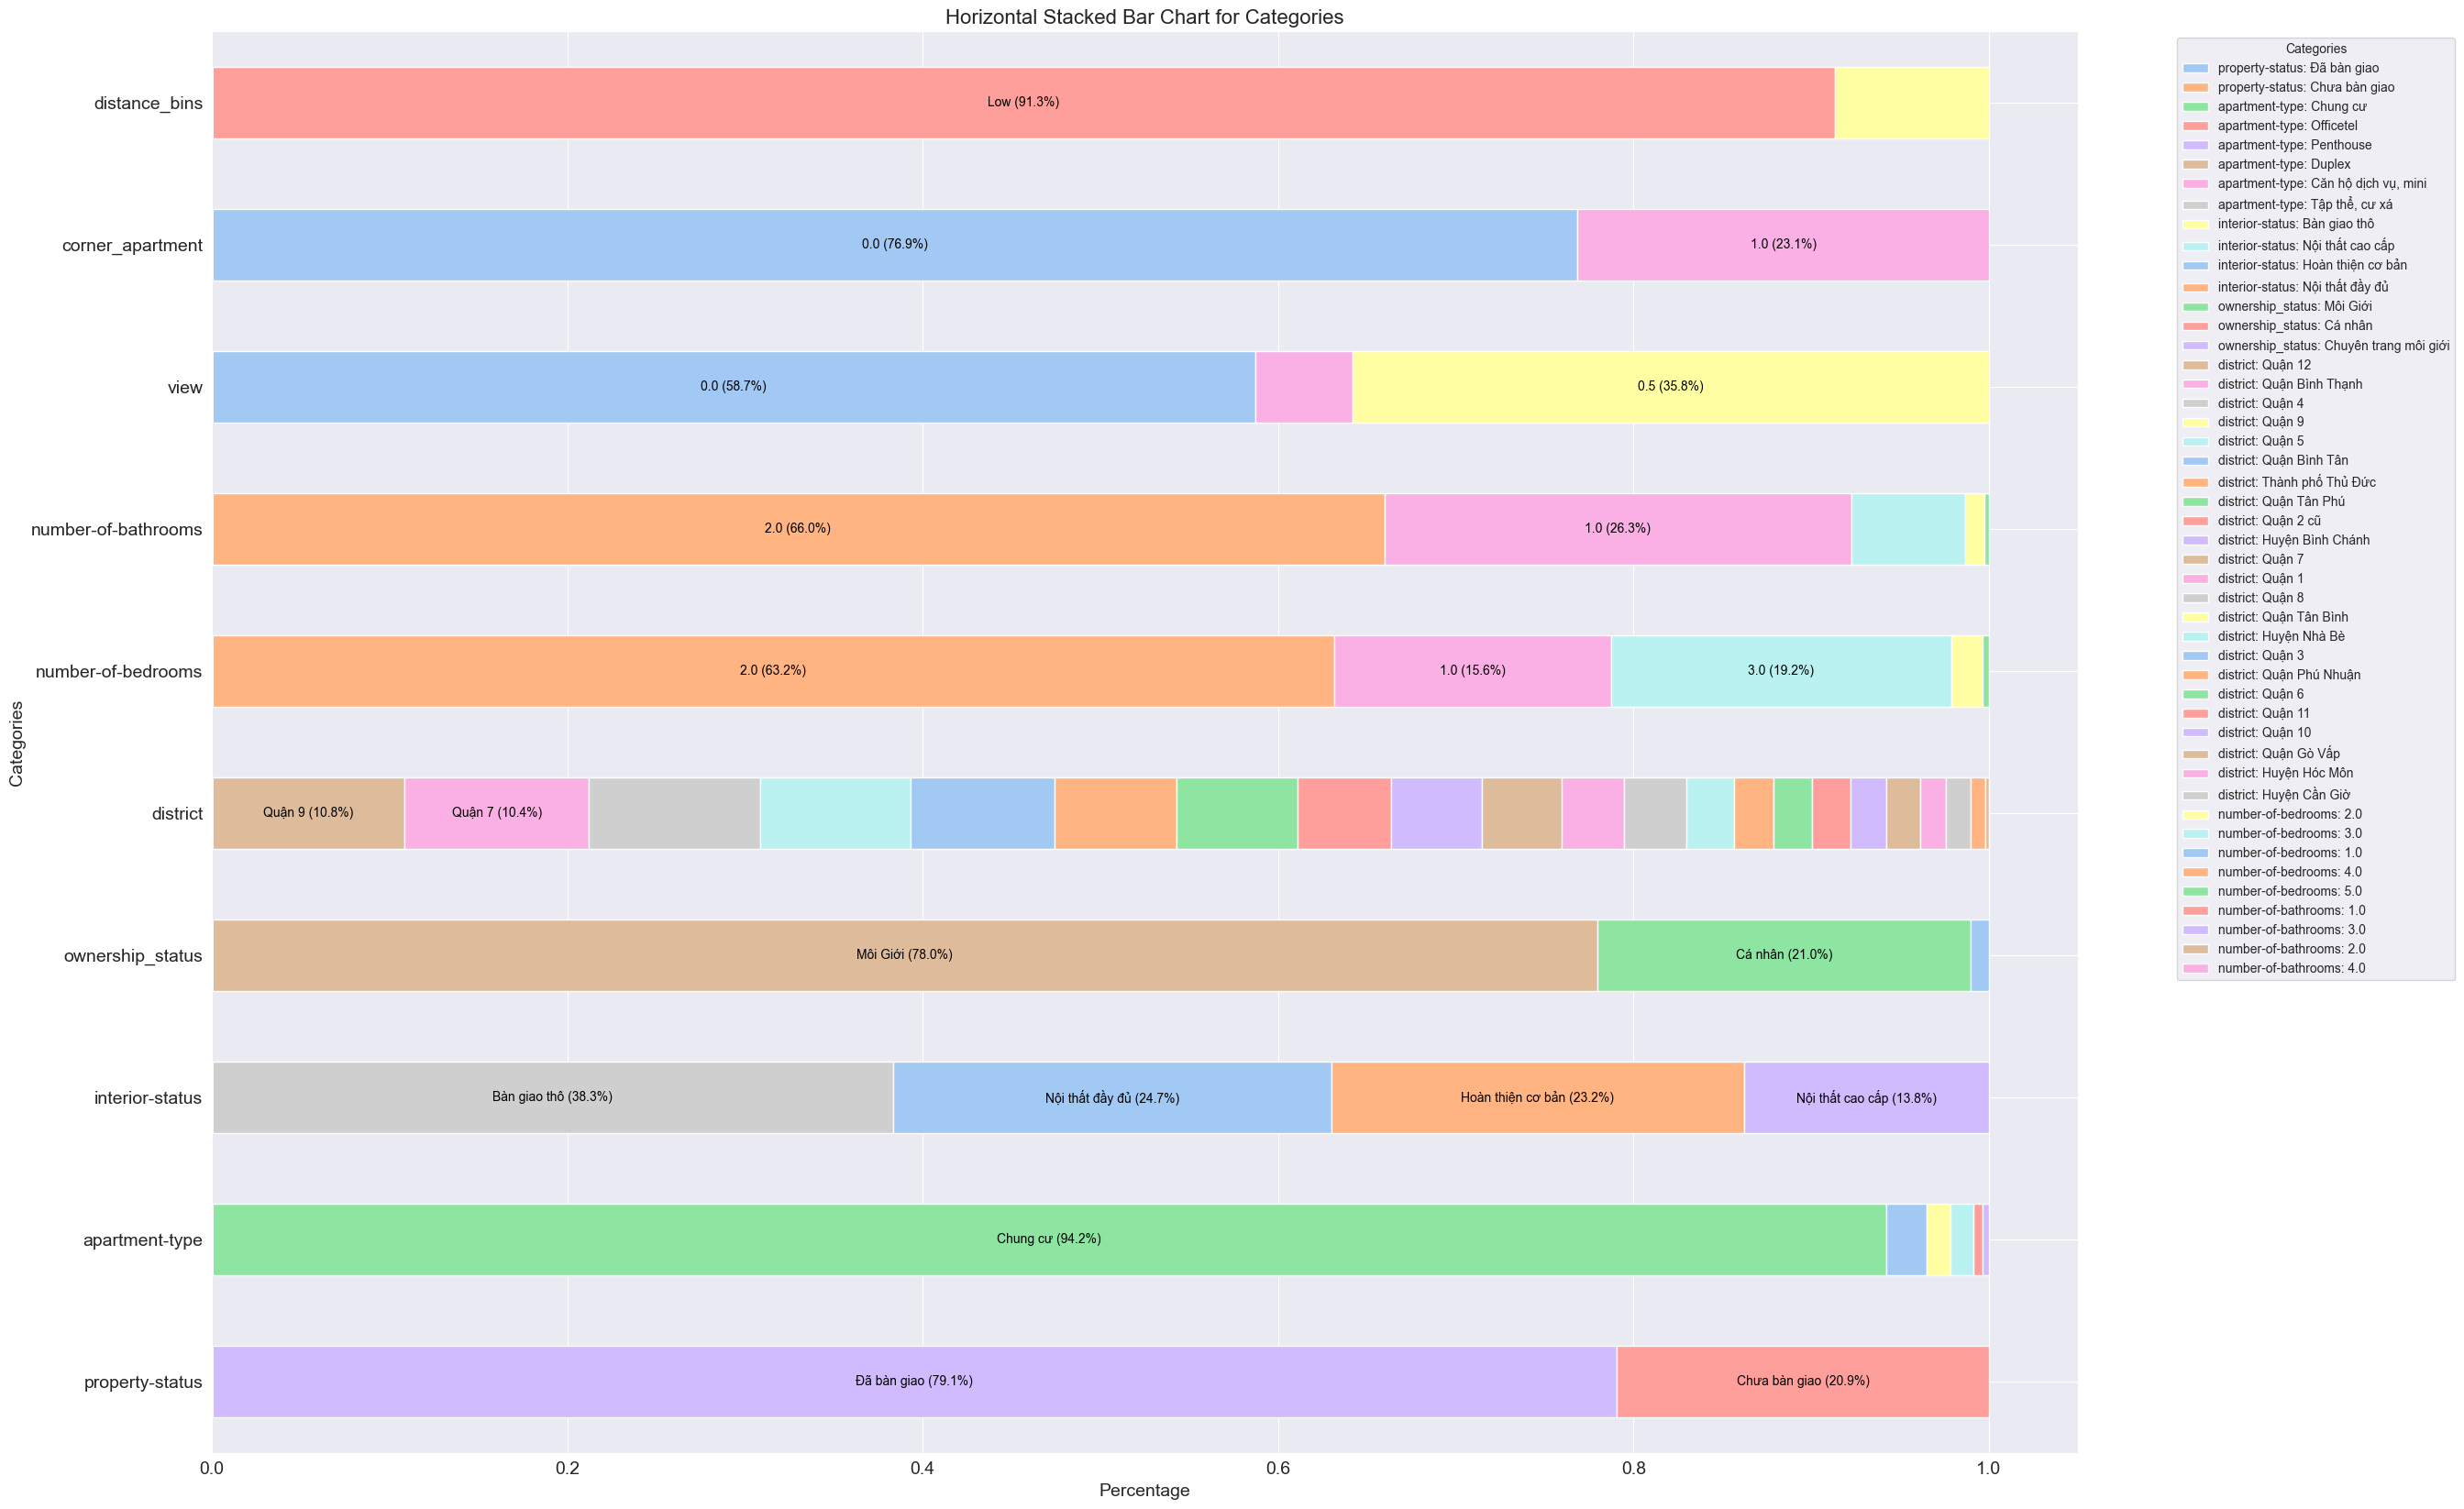

In [ ]:
def plot_stacked_barh(df, cat_cols):
    df333 = df[cat_cols]
    categorical_cols = df333.columns

    # Tính toán tỷ lệ phần trăm trên các cột phân loại
    df_percentage = df333[categorical_cols].apply(lambda x: x.value_counts(normalize=True))

    # Sắp xếp các hàng theo tổng giá trị phần trăm giảm dần
    df_percentage = df_percentage.loc[df_percentage.sum(axis=1).sort_values(ascending=False).index]

    # Sử dụng bảng màu pastel
    pastel_colors = sns.color_palette("pastel", len(df_percentage.index))

    # Vẽ biểu đồ bar ngang với xoay ngang
    ax = df_percentage.T.plot(
        kind='barh', stacked=True, figsize=(27, 18), fontsize=14, rot=0, color=pastel_colors
    )

    # Đặt legend riêng lẻ
    legend_labels = [f"{col}: {val}" for col in df333.columns for val in df333[col].unique()]
    ax.legend(legend_labels, title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

    ax.set_title('Horizontal Stacked Bar Chart for Categories', fontsize=16)
    ax.set_xlabel('Percentage', fontsize=14)
    ax.set_ylabel('Categories', fontsize=14)

    # Thêm giá trị nhãn và tên cột bên trong cột, đặt chúng vào giữa
    for idx, col in enumerate(df_percentage.columns):
        for val in df_percentage.index:
            percentage = df_percentage.loc[val, col]
            if not pd.isna(percentage) and percentage > 0.1:  # Chỉ hiển thị nhãn cho phần trăm lớn hơn 10%
                x_pos = df_percentage[col].loc[:val].sum() - (percentage / 2)
                ax.text(x_pos, idx, f'{val} ({percentage:.1%})', color='black', ha='center', va='center')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


plot_stacked_barh(df, cat_cols)


**Nhận xét**
+ Biến distance_bins cho thấy 91.3% là các chung cư/ căn hộ có khoảng cách gần trung tâm thành phố. Chỉ chiếm một lượng nhỏ bài đăng bán là có vị trí cách xa trung tâm thành phố. Cho thấy đa phần mọi người có nhu cầu mua nhà gần trung tâm hơn vì nhiều lý do như tiện nghi sinh hoạt, cơ sở vật chất, ... Từ đó mà nhu cầu xây dựng nhà đất cho thuê/ bán nhà ở, phòng trọ, chung cư, căn hộ cũng tăng cao.
+ Biến corner_apartment cho thấy có tới ~80% là các chung cư/ căn hộ không căn góc. Chỉ có 23% là có view. Điều này có thể lý giải bởi do gần trung tâm, nhu cầu xây dựng nhà đất cho thuê/ bán nhà ở, phòng trọ, chung cư, căn hộ, ... xây dựng các cơ sở vật chất chủ chốt của thành phố cao nên thường thiết kế các công trình sẽ là các tòa nhà cao tầng. Vậy nên là số lượng nhà căn không căn góc chiếm đa số.
+ Biến view cho thấy có tới 59% là các chung cư/ căn hộ không có view, 36% là có view bất kỳ, phần còn lại là có view sông. Có thể thầy rằng những chung cư/ căn hộ cao tầng sẽ có view nhìn ra xa, còn những chung cư/ căn hộ gần đất thì thường không có view. Riêng những chung cư/ căn hộ có view sông thường là sẽ nằm ở những quận xa trung tâm thành phố.
+ Biến number_of_bathrooms cho thấy số lượng phòng tắm là 2 là chủ yếu, chiếm 66%, tiếp đến là nhà có 1 phòng tắm chiếm hơn 26%. Cho thấy chung cư/ căn hộ có 2 phòng tắm rất được ưa chuộng. Từ điều này, những chủ nhà thầu đầu tư, có thể đầu tư nguồn vốn vào những tòa nhà cho thuê/ bán chung cư căn hộ có 2 phòng tắm.
+ Biến district cho thấy số lượng bài đăng buôn bán ở từng quận khác biệt và chênh lệch rõ ràng, chỉ yếu là ở quận 9, quận 7, huyện cần giờ, huyện nhà bè, ... vì những nơi này ở gần trung tâm Thành phố. Kiểm chứng với biến distance_bins cho thấy đúng là nhu cầu ở gần trung tâm luôn cao.
+ Biến ownership_status có tới 78% là môi giới, 21% là Cá nhân và còn lại chiếm không tới 1% là chuyên trang môi giới. Điều này cho thấy chủ yếu Môi giới là người đứng ra làm việc giữa hai bên bán và mua. Cho thấy nghề Môi giới này rất phổ biến và có thể mang lại lợi nhuận tốt. Tuy nhiên, khi kết hợp với những quan sát trên, giá bán khi qua tay Môi giới lại rất phức tạp, điều này có thể tác động xấu đến hai bên người bán và người mua. Như vậy, khuyến khích cá nhân tự bán hoặc qua Chuyên trang môi giới, giá sẽ ổn định hơn rõ rệt.
+ Biến interior_status chỉ ra tình trạng bàn giao của chung cư/ căn hộ cho thấy số lượng giữa từng loại khá ổn định, nhiều nhất là Bàn giao thô chiếm hơn 28% và thấp nhất là Nội thất cao cấp gần 14%. Cho thấy các nhà được bán ra đa phần là được bàn giao thô, có thể là chủ nhà, hoặc các nhà đầu tư tập trung nhiều vào vị trí của căn hộ hơn là nội thất bên trong.
+ Biến apartment_type cho thấy có tới hơn 94% là Chung cư, và phần còn lại là căn hộ dịch vụ, mini; oficetel; tập thể, cư xá, Penhouse, Duplex
. Cho thấy việc buôn bán loại hình nhà ở Chung cư phổ biến rất nhiều, và chiếm tối đa. Đồng thời, cho thấy dữ liệu bị mất cân bằng trầm trọng giữa các loại nhà bán. Điều này ảnh hưởng tới kết quả mô hình dự đoán.


# 3.PHÂN TÍCH VÀ XỬ LÝ NGOẠI LỆ

## 3.1 Biến numeric

### Phân tích

In [ ]:
def detect_outliers_iqr(df, cols):
    outlier_stats_list = []

    for column in cols:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)

        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

        total = len(df[column])
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / total) * 100

        outlier_stats_list.append({
            "Col": column,
            "Outliers": outlier_count,
            "Out_per": round(outlier_percentage, 2)
        })

    outlier_stats = pd.DataFrame(outlier_stats_list)
    return outlier_stats

In [ ]:
df_outlier = detect_outliers_iqr(df, num_cols)
display(df_outlier)

,Col,Outliers,Out_per
0,square,325,6.27
1,price,447,8.63
2,naive_price,411,7.93


Nhận xét:
+ Số lượng ngoại lệ ở mức tương đối ít gồm square(6.27%), price(8.63%) và naive_price (7.93%)

### Xử lý

In [ ]:
def deal_num_outl(df, num_cols):
  for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
  return df

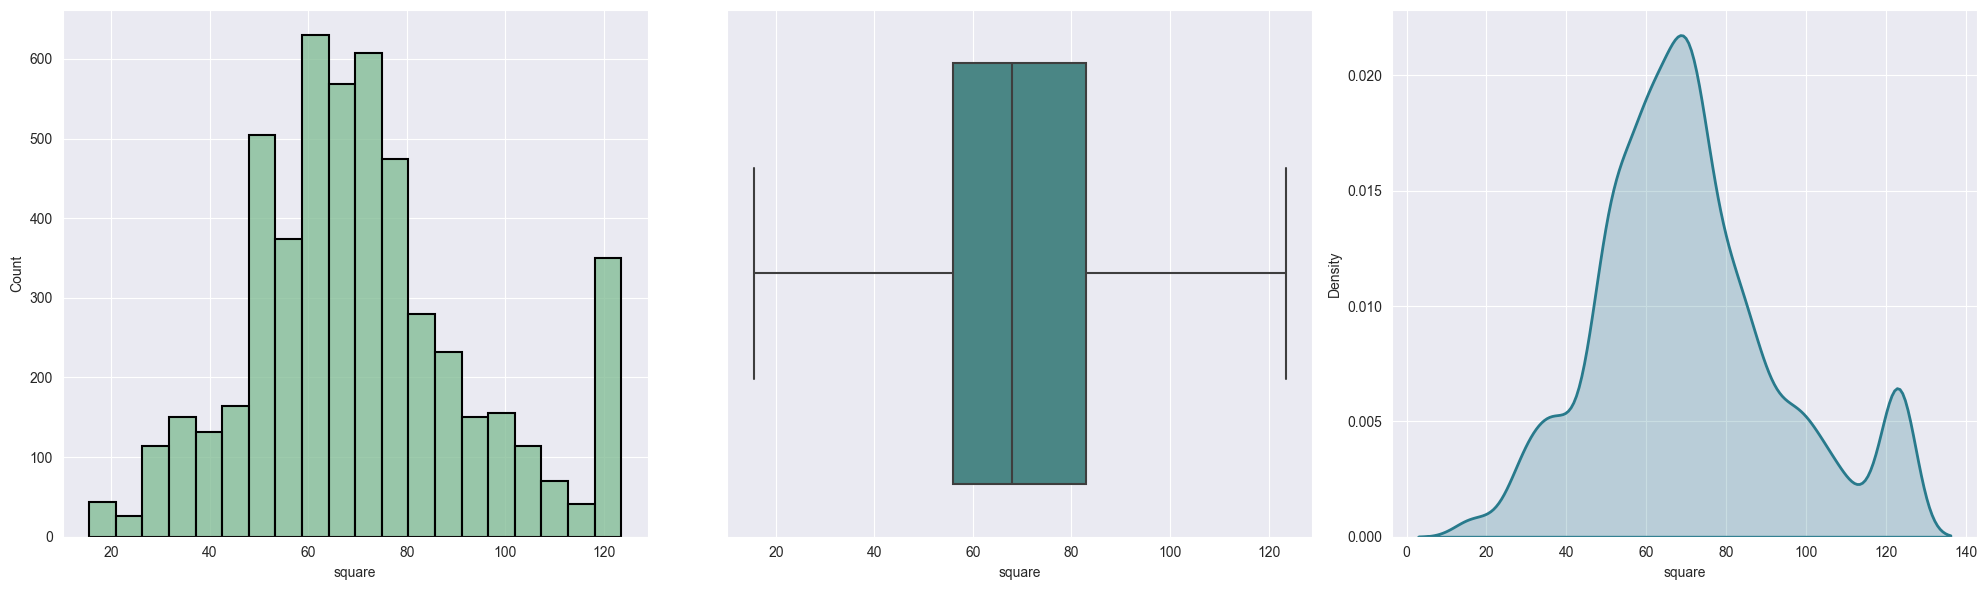

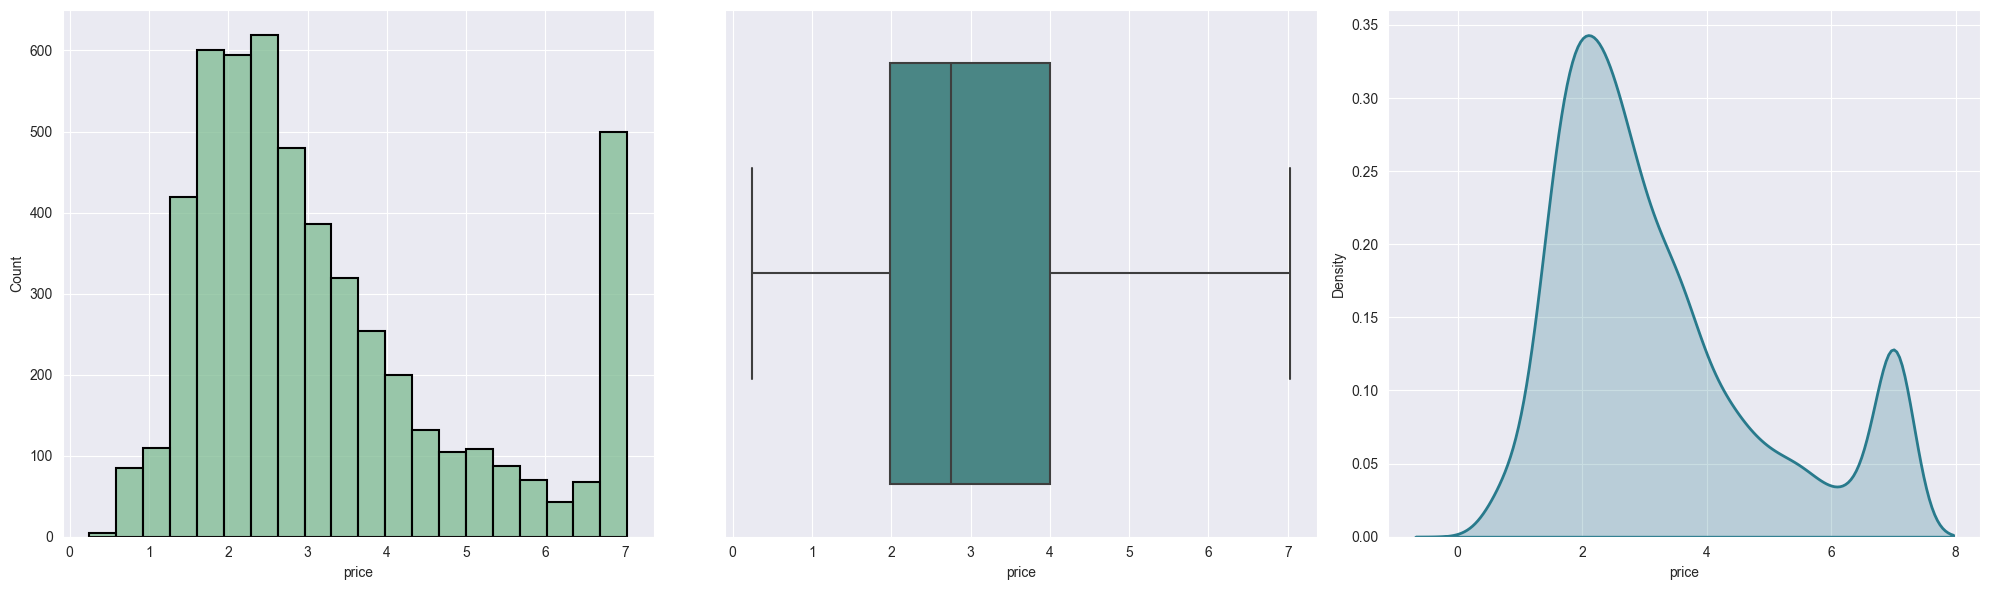

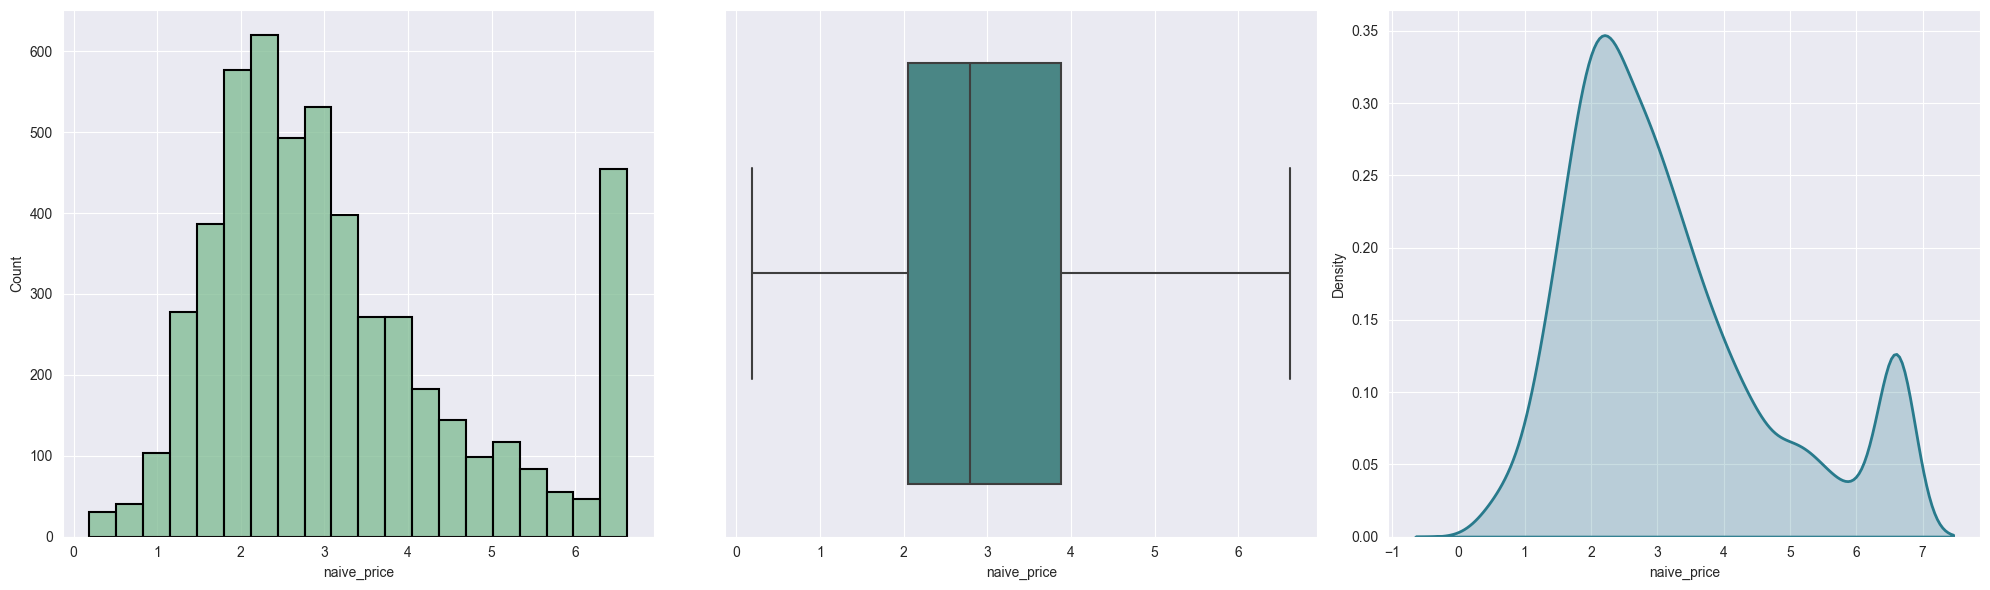

,Column,Skewness
0,square,0.51
1,price,0.99
2,naive_price,0.89


In [ ]:
df = deal_num_outl(df, num_cols)

columns = ['Column', 'Skewness']
distribution_info_list = []

for col in num_cols:
    skewness = plot_distribution(df, col)
    distribution_info_list.append({'Column': col, 'Skewness': skewness})

distribution_info = pd.DataFrame(distribution_info_list)
distribution_info

**Nhận xét:**
+ Sau khi sử lý giá trị ngoại lai, các biến square, price, và naive_price có xu hướng phân phối rõ ràng lên. 
+ Nhìn chung, độ lệch đều được giảm đáng kể. 


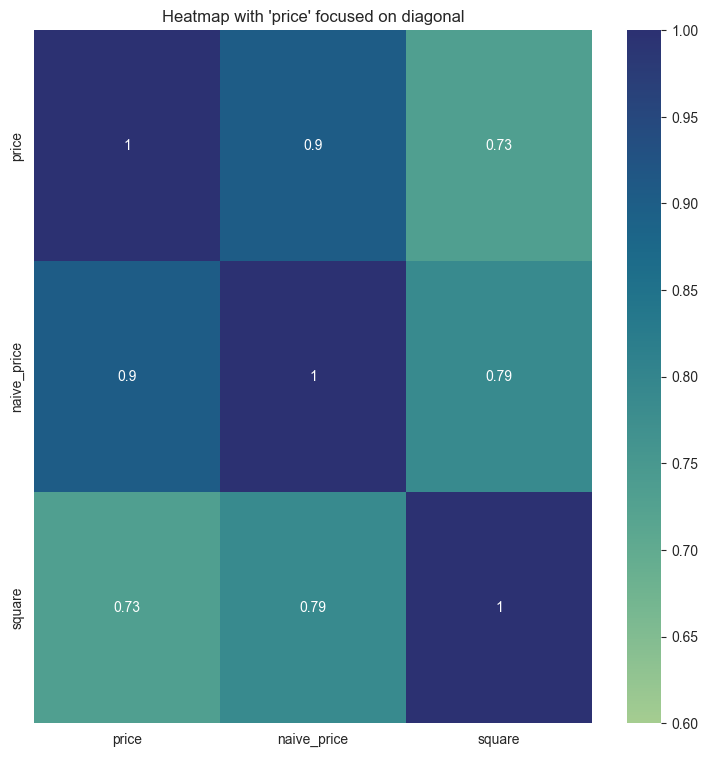

In [ ]:
correlation_matrix = df[num_cols].corr()
variables = correlation_matrix.index.tolist()

# Xếp lại thứ tự biến với 'price' là tiêu điểm
reordered = sorted(variables, key=lambda x: abs(correlation_matrix.loc['price', x]), reverse=True)
reordered_corr = correlation_matrix.loc[reordered, reordered]

# Vẽ heatmap
plt.figure(figsize=(9, 9))
sns.heatmap(reordered_corr, annot=True, vmin=0.6, vmax=1, cmap='crest')
plt.title("Heatmap with 'price' focused on diagonal")
plt.show()

In [ ]:
correlation_matrix = df[num_cols].corr()
correlation_with_target = correlation_matrix['price'].sort_values(ascending=False)
print(correlation_with_target)

price          1.000000
naive_price    0.903369
square         0.731500
Name: price, dtype: float64


Nhận xét:
+ Sau khi xử lý các giá trị ngoại lệ, độ tương quan giữa các biến độc lập square và naive_price với biến phụ thuộc price tăng cao
-> Có lợi cho mô hình học được

## 3.2 Biến categorical

### Phân tích

### Xử lý

In [ ]:
def check_ttest_and_percentage(df, cat_column, target_column, percentage_threshold=5, pvalue_threshold=0.05):
    categories = df[cat_column].unique()

    # Kiểm tra tần suất của từng nhóm trong cat_column
    value_counts = df[cat_column].value_counts(normalize=True) * 100

    # Nếu có nhóm nào có phần trăm < percentage_threshold thì trả về True
    for category, frequency in value_counts.items():
        if frequency < percentage_threshold:
            return True

    # Thực hiện kiểm định t-test giữa từng cặp nhóm
    for i, cat1 in enumerate(categories):
        for j, cat2 in enumerate(categories):
            if i < j:
                group1 = df[df[cat_column] == cat1][target_column]
                group2 = df[df[cat_column] == cat2][target_column]
                t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
                if p_value > pvalue_threshold:
                    return True

    # Nếu không có nhóm nào thỏa mãn điều kiện trên thì trả về False
    return False

for c in cat_cols:
    result = check_ttest_and_percentage(df, c, 'price')
    if result:
        print(c)


apartment-type
interior-status
ownership_status
district
number-of-bedrooms
number-of-bathrooms


*Nhận xét:* 
Biến phân loại nào có số lượng của loại giá trị nào đó bé hơn 5% được xem là ngoại lệ, thu được các biến như sau:
apartment-type
interior-status
ownership_status
district
number-of-bedrooms
number-of-bathrooms


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

def plot_means_and_ttests(df, col):
    info_list = []
    # Tính mean, count và tần suất
    for value, num in df[col].value_counts().items():
        mean_price = df[df[col] == value]['price'].mean()
        info_list.append({
            'val_name': value,
            'num': num,
            'num_per': round(num / len(df[col]), 4) * 100,
            'mean_price': round(mean_price, 4)
        })

    # Tạo DataFrame tổng hợp thông tin
    df_info = pd.DataFrame(info_list).sort_values(by=['num_per'], ascending=False)

    # Hiển thị thông tin tổng hợp
    print('Kiểm tra thông tin của biến:', col)
    display(df_info)

    # Lọc các nhóm có tần suất nhỏ hơn 5%
    # df_temp = df_info[df_info['num_per'] < 5]
    # if len(df_temp) > 0:
    print("\nKết quả t-test giữa các nhóm có p_value > 0.05:")
    unique_values = df[col].unique()
    significant_groups = []

    # Duyệt qua từng cặp nhóm
    for i in range(len(unique_values)):
        for j in range(i + 1, len(unique_values)):
            group1 = df[df[col] == unique_values[i]]['price']
            group2 = df[df[col] == unique_values[j]]['price']

            # Tính t-test
            t_stat, p_value = ttest_ind(group1, group2, equal_var=False)

            # Lưu kết quả nếu p_value > 0.05
            if p_value > 0.05:
                significant_groups.append({
                    'group1': unique_values[i],
                    'group2': unique_values[j],
                    'p_value': round(p_value, 4),
                    't_stat': round(t_stat, 4)
                })

    # In ra các cặp nhóm có p_value > 0.05
    if significant_groups:
        df_ttest = pd.DataFrame(significant_groups)
        display(df_ttest)
    else:
        print("Không có cặp nhóm nào có p_value > 0.05.")
    # else:
    #     print("Không có nhóm nào có tần suất nhỏ hơn 5%.")

    # Sắp xếp df_info theo mean_price tăng dần
    df_info_sorted = df_info.sort_values(by='mean_price', ascending=True)

    # Vẽ biểu đồ cột thể hiện mean_price theo thứ tự tăng dần
    plt.figure(figsize=(8, 6))
    sns.barplot(x='val_name', y='mean_price', data=df_info_sorted, palette='crest')
    plt.xticks(rotation=90 if len(df_info_sorted['val_name']) > 5 else 0)  # Xoay nhãn nếu nhóm > 5
    plt.title(f"Giá trị trung bình của từng nhóm trong biến '{col}'")
    plt.xlabel(col)
    plt.ylabel("Mean Price")
    plt.show()

Loại căn hộ

Kiểm tra thông tin của biến: apartment-type


,val_name,num,num_per,mean_price
0,Affordable,4928,95.12,3.1988
1,Luxury,137,2.64,6.0172
2,Low Price,116,2.24,2.1595



Kết quả t-test giữa các nhóm có p_value > 0.05:
Không có cặp nhóm nào có p_value > 0.05.


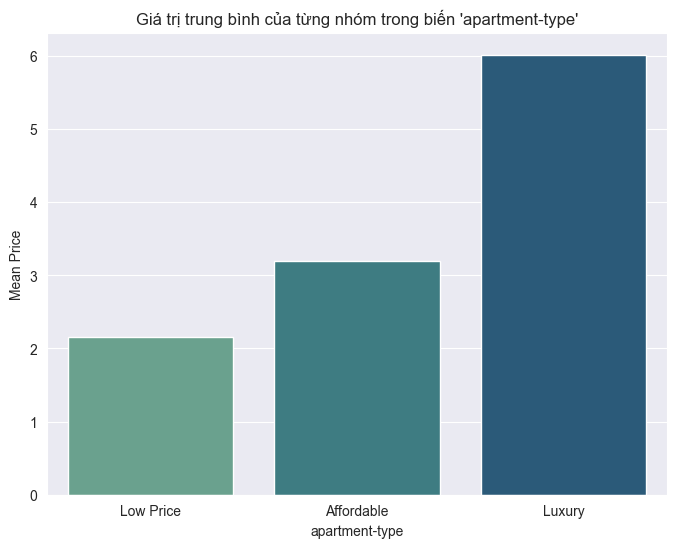

In [ ]:
plot_means_and_ttests(df, 'apartment-type')

In [ ]:
group_mapping = {
    'Chung cư': 'Affordable',
    'Căn hộ dịch vụ, mini': 'Affordable',
    'Tập thể, cư xá': 'Affordable',
    'Officetel': 'Low Price',
    'Duplex': 'Luxury',
    'Penthouse': 'Luxury'
}
df['apartment-type'] = df['apartment-type'].map(group_mapping)

print(automatic_anova(df, 'apartment-type', 'price'))

(221.76967393991643, 3.892983361213877e-93)


**Nhận xét:**
+ Dù kiểm định t-test có ý nghĩa, nhưng để tránh số lượng quá ít ở một số loaij, vậy nên dựa vào giá trung bình của từng loại nhà, tiến hành gom nhóm các loại nhà ở theo giá trung bình như sau:
    + Affordable: chung cư; căn hộ dịch vụ, mini; Tập thể, cư xá
    + Luxury: Duplex và Penhouse
    + Low price: Officetel
+ Kiểm định một lần nữa bằng anova, cho thấy có sự tương quan mạnh giữa các nhóm và p_value thấp hơn 0.05 cho thấy kết quả kiểm định có ý nghĩa thống kê.

Quyền sở hữu

Kiểm tra thông tin của biến: ownership_status


,val_name,num,num_per,mean_price
0,Other,5127,98.96,3.2438
1,Chuyên trang,54,1.04,3.8413



Kết quả t-test giữa các nhóm có p_value > 0.05:
Không có cặp nhóm nào có p_value > 0.05.


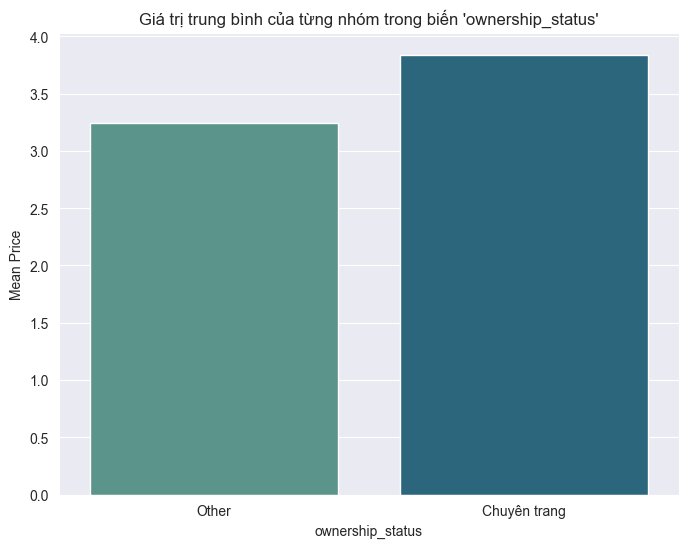

In [ ]:
plot_means_and_ttests(df, 'ownership_status')

In [ ]:
def combine_ownership_groups(status):
    if status == "Chuyên trang môi giới":
        return "Chuyên trang"
    else: return 'Other'

df['ownership_status'] = df['ownership_status'].apply(combine_ownership_groups)
print(automatic_anova(df, 'ownership_status', 'price'))

(6.504218069345844, 0.010790424080027849)


**Nhận xét:**
+ Dựa vào giá nhà trung bình của từng loại ownership_status, tuy biến Chuyên trang chỉ có 54 mẫu quan sát, chiếm khoảng 1% nhưng lại có giá trung bình là 3.8 cao hơn nhiều so với những loại còn lại vậy nên tiến hành gom nhóm các loại ownership_statusstatus theo giá trung bình như sau:
    + Với loại hìnhhình là Chuyên trang môi giới, thì thay bằng Chuyên trang (cho ngắn gọngọn)
    + Với những loại hình còn lại, thì gom thành OtherOther
+ Kiểm định một lần nữa bằng anova, cho thấy có sự tương quan mạnh giữa các nhóm và p_value thấp hơn 0.05 cho thấy kết quả kiểm định có ý nghĩa thống kê.

Tình trạng nội thất

Kiểm tra thông tin của biến: interior-status


,val_name,num,num_per,mean_price
0,Bàn giao thô,1985,38.31,3.1056
1,Nội thất đầy đủ,1279,24.69,3.1767
2,Hoàn thiện cơ bản,1203,23.22,3.0315
3,Nội thất cao cấp,714,13.78,4.1510



Kết quả t-test giữa các nhóm có p_value > 0.05:


,group1,group2,p_value,t_stat
0,Bàn giao thô,Hoàn thiện cơ bản,0.2140,1.2430
1,Bàn giao thô,Nội thất đầy đủ,0.2205,-1.2254


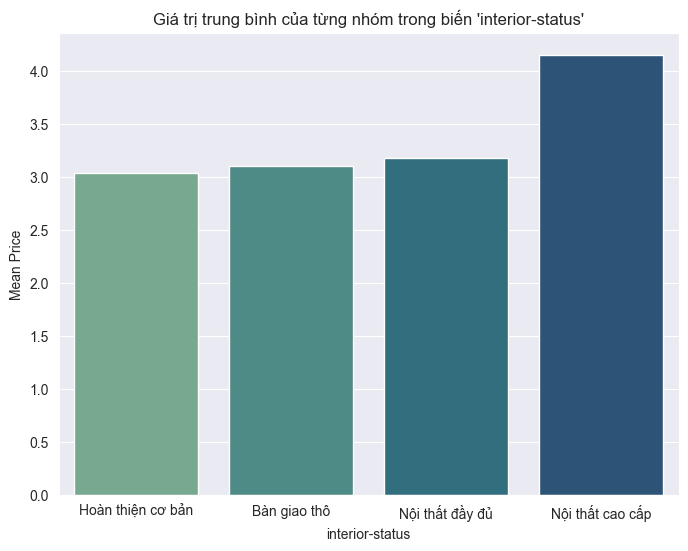

In [ ]:
plot_means_and_ttests(df, 'interior-status')

In [ ]:
def combine_interior_groups(status):
    if status == "Nội thất cao cấp":
        return status
    else: return 'Other'

df['interior-status'] = df['interior-status'].apply(combine_interior_groups)
print(automatic_anova(df, 'interior-status', 'price'))

(239.49692663132518, 7.60053553636078e-53)


**Nhận xét:**
+ Dựa vào giá nhà trung bình của từng loại interior_status, Loại hình Nội thất cao cấp chiếm số lượng ít nhất (gần 14%) nhưng có giá trung bình cách xa so với những nhóm còn lại (dao động ở mức 3.00)
+ Kiểm định t-test giữa các loại interior_status, tiến hành gom nhóm các loại tình trạng nội thất theo giá trung bình như sau:
    + Với loại hình là Nội thất cao cấp thì giữ nguyên 
    + Với những loại hình còn lại thì gom thành Other
+ Kiểm định một lần nữa bằng anova, cho thấy có sự tương quan mạnh giữa các nhóm và p_value thấp hơn 0.05 cho thấy kết quả kiểm định có ý nghĩa thống kê.

Số phòng ngủ

Kiểm tra thông tin của biến: number-of-bedrooms


,val_name,num,num_per,mean_price
0,2.0,3273,63.17,2.9766
1,3.0,993,19.17,4.6871
2,1.0,806,15.56,2.1918
3,4.0,90,1.74,6.1309
4,5.0,19,0.37,6.4957



Kết quả t-test giữa các nhóm có p_value > 0.05:


,group1,group2,p_value,t_stat
0,4.0,5.0,0.1559,-1.4441


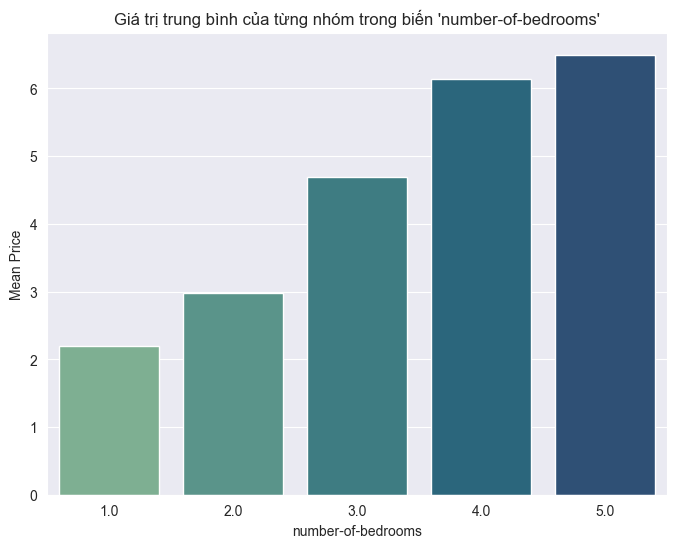

In [ ]:
plot_means_and_ttests(df, 'number-of-bedrooms')

In [ ]:
def combine_bedrooms_groups(status):
    if status == 4.0 or status == 5.0:
        return 4.5
    else: return status

df['number-of-bedrooms'] = df['number-of-bedrooms'].apply(combine_bedrooms_groups)
print(automatic_anova(df, 'number-of-bedrooms', 'price'))

(646.1291683381227, 0.0)


**Nhận xét:**
+ Dựa vào giá nhà trung bình của từng loại phòng ngủ, nhà có số lượng phòng ngủ là 4 và 5 có mức giá trung bình đạt mức trên 6.2 tỷ. Những loại hình còn lại có giá dưới 5 tỷ. 
+ Kiểm định t-test giữa các loại phòng ngủ, tiến hành gom nhóm số lượng phòng ngủ theo giá trung bình như sau:
    + Với số phòng ngủ là 4 hoặc 5, thì trả về 4.5
    + Với số lượng phòng ngủ còn lại thì giữ nguyên
+ Kiểm định một lần nữa bằng anova, cho thấy có sự tương quan mạnh giữa các nhóm và p_value thấp hơn 0.05 cho thấy kết quả kiểm định có ý nghĩa thống kê.

Số phòng tắm

Kiểm tra thông tin của biến: number-of-bathrooms


,val_name,num,num_per,mean_price
0,2.0,3418,65.97,3.3519
1,1.0,1362,26.29,2.3070
2,3.0,331,6.39,5.4222
3,4.0,57,1.10,6.2360
4,5.0,13,0.25,6.8546



Kết quả t-test giữa các nhóm có p_value > 0.05:
Không có cặp nhóm nào có p_value > 0.05.


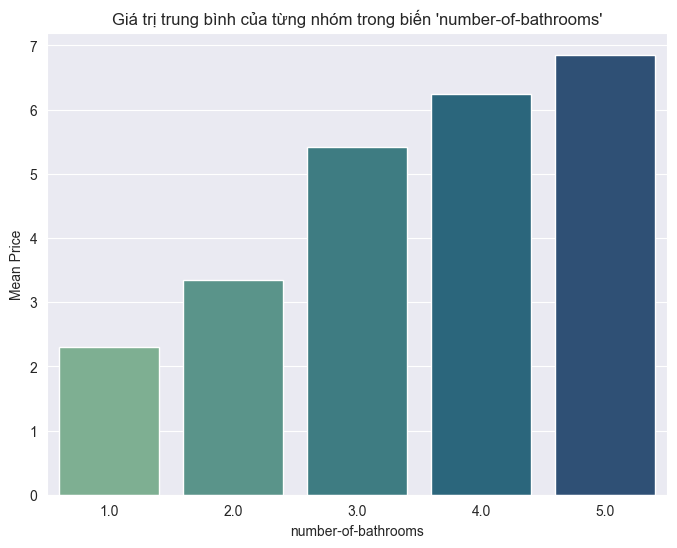

In [ ]:
plot_means_and_ttests(df, 'number-of-bathrooms')

In [ ]:
def combine_bathrooms_groups(status):
    if status == 4.0 or status == 5.0:
        return 4.5
    else: return status

df['number-of-bathrooms'] = df['number-of-bathrooms'].apply(combine_bathrooms_groups)
print(automatic_anova(df, 'number-of-bathrooms', 'price'))

(512.3435234394441, 1.5282510047128438e-291)


**Nhận xét:**
+ Dựa vào giá nhà trung bình của từng loại phòng tắm, nhà có số lượng phòng tắm là 4 và 5 có mức giá trung bình đạt mức trên 6.2 tỷ. Những loại hình còn lại có giá dưới 5 tỷ. 
+ Kiểm định t-test giữa các loại phòng tắm, tiến hành gom nhóm số lượng phòng tắm theo giá trung bình như sau:
    + Với số phòng tắm là 4 hoặc 5, thì trả về 4.5
    + Với số lượng phòng tắm còn lại thì giữ nguyên
+ Kiểm định một lần nữa bằng anova, cho thấy có sự tương quan mạnh giữa các nhóm và p_value thấp hơn 0.05 cho thấy kết quả kiểm định có ý nghĩa thống kê.

Kiểm tra thông tin của biến: district


,val_name,num,num_per,mean_price
0,Quận 9,561,10.83,2.8032
1,Quận 7,538,10.38,3.5047
2,Quận Tân Phú,499,9.63,3.7304
3,Quận 2 cũ,440,8.49,4.4294
4,Quận 8,419,8.09,2.4539
5,Quận Bình Tân,356,6.87,2.4136
6,Huyện Bình Chánh,352,6.79,2.1752
7,Quận 12,272,5.25,2.1227
8,Thành phố Thủ Đức,265,5.11,2.5227
9,Quận Bình Thạnh,234,4.52,4.6969



Kết quả t-test giữa các nhóm có p_value > 0.05:


F:\library_python\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: divide by zero encountered in divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
F:\library_python\Lib\site-packages\scipy\stats\_stats_py.py:1114: RuntimeWarning: invalid value encountered in scalar multiply
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero


,group1,group2,p_value,t_stat
0,Quận 12,Huyện Bình Chánh,0.4523,-0.7521
1,Quận Bình Thạnh,Quận 2 cũ,0.1167,1.5717
2,Quận Bình Thạnh,Quận Phú Nhuận,0.2726,1.1001
3,Quận Bình Thạnh,Quận 10,0.4704,0.7229
4,Quận 4,Quận 5,0.2869,1.0690
5,Quận 4,Quận 2 cũ,0.1170,-1.5726
6,Quận 4,Quận 3,0.6058,0.5182
7,Quận 4,Quận Phú Nhuận,0.2216,-1.2259
8,Quận 4,Quận 10,0.0929,-1.6868
9,Quận 9,Huyện Nhà Bè,0.3874,-0.8657


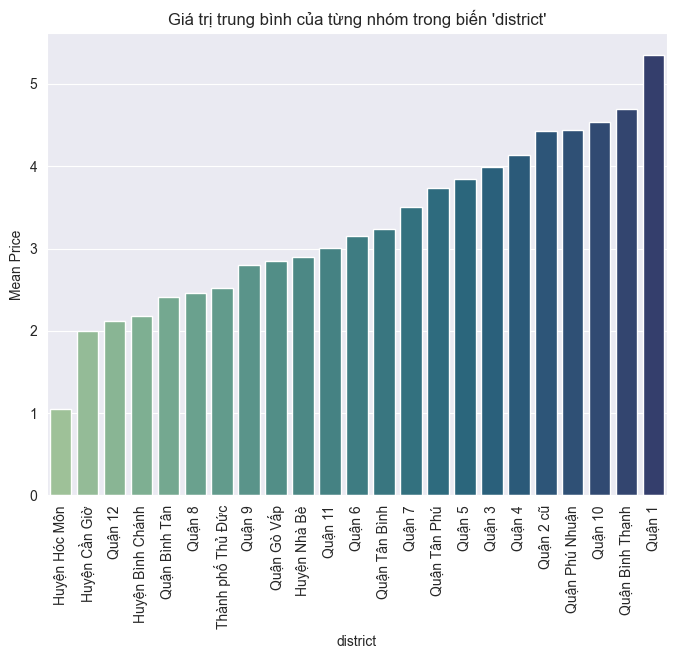

In [ ]:
plot_means_and_ttests(df, 'district')

Trực quan giá chung cư/ căn hộ ở các quận so với vị trí trung tâm Quận 1

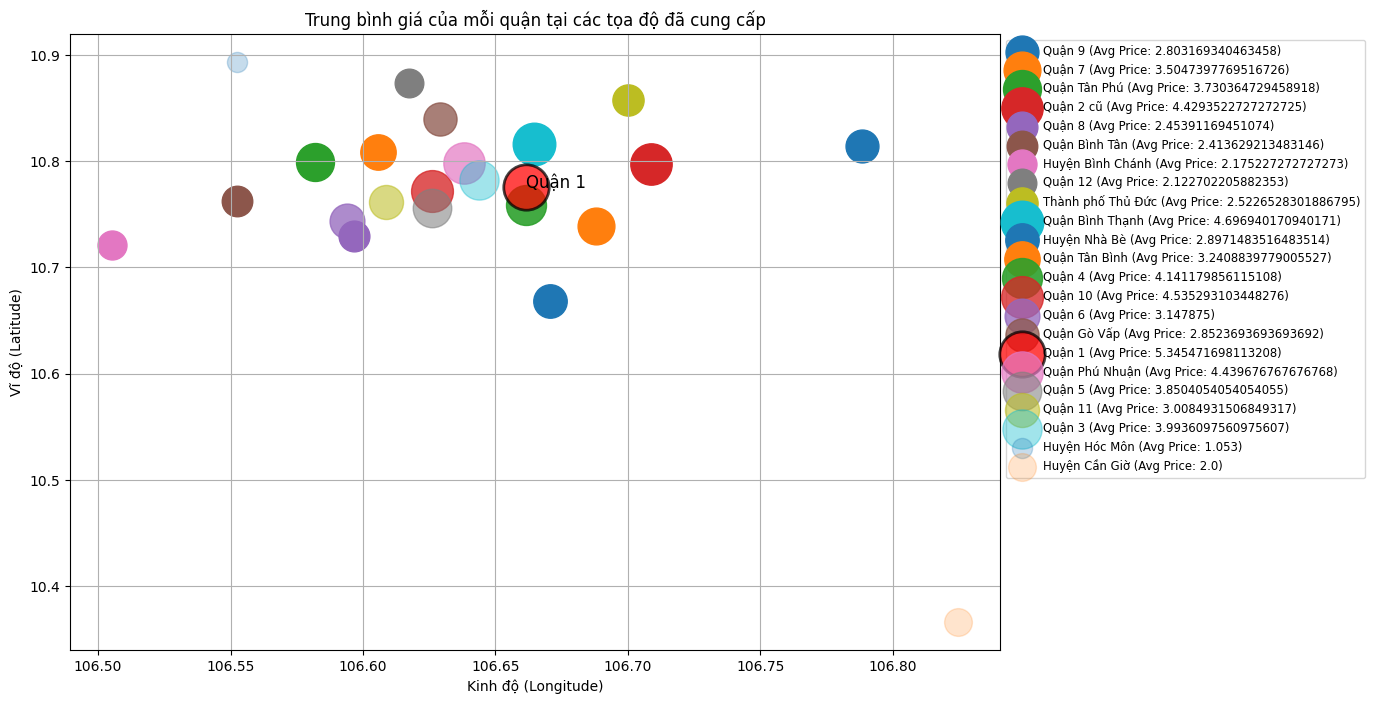

In [ ]:
dict_district = {"Quận 9": [10.8146365,106.7884373],
                 "Quận 7": [10.738541,106.6881612],
                 "Quận Tân Phú": [10.7988284,106.582036],
                 "Quận 2 cũ": [10.7968535,106.708814],
                 "Quận 8": [10.7299458,106.5967725],
                 "Quận Bình Tân": [10.7623112,106.5525659],
                 "Huyện Bình Chánh": [10.7213116,106.5054222],
                 "Quận 12": [10.8731776,106.6174053],
                 "Thành phố Thủ Đức": [10.8576918,106.699956],
                 "Quận Bình Thạnh": [10.8160692,106.6645734],
                 "Huyện Nhà Bè": [10.6687879,106.6704701],
                 "Quận Tân Bình": [10.8084279,106.6056149],
                 "Quận 4": [10.759052,106.6616251],
                 "Quận 10": [10.7718874,106.6262485],
                 "Quận 6": [10.7437175,106.5938251],
                 "Quận Gò Vấp": [10.8398201,106.6291964],
                 "Quận 1": [10.7753855,106.6616251],
                 "Quận Phú Nhuận": [10.7984696,106.6380401],
                 "Quận 5": [10.7555521,106.6262485],
                 "Quận 11": [10.7619676,106.6085624],
                 "Quận 3": [10.7818055,106.6439361],
                 "Huyện Hóc Môn": [10.8931272,106.5525659],
                 "Huyện Cần Giờ": [10.3659417,106.8246128]}
avg_price = df.groupby('district')['price'].mean()
value_counts = df['district'].value_counts()
# Vẽ biểu đồ scatter plot
plt.figure(figsize=(12, 8))
for district, coords in dict_district.items():
    if district == "Quận 1":
        plt.scatter(coords[1], coords[0], s=avg_price[district] * 200, alpha=min(0.2 + value_counts[district]/200, 1), color='red', edgecolors='black', linewidths=2, label=f"{district} (Avg Price: {avg_price[district]})")
        plt.text(coords[1], coords[0], district, fontsize=12, ha='left')
    else:
        plt.scatter(coords[1], coords[0], s=avg_price[district] * 200, alpha=min(0.2 + value_counts[district]/200, 1), label=f"{district} (Avg Price: {avg_price[district]})")

# Thiết lập tiêu đề và nhãn
plt.title("Trung bình giá của mỗi quận tại các tọa độ đã cung cấp")
plt.xlabel("Kinh độ (Longitude)")
plt.ylabel("Vĩ độ (Latitude)")
plt.legend(loc="best", fontsize='small', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()


In [ ]:
# Tạo dictionary ánh xạ quận/huyện vào nhóm
district_group_map = {
    # Nhóm 1
    'Huyện Bình Chánh': 'Giá thấp',
    'Huyện Cần Giờ': 'Giá thấp',
    'Huyện Hóc Môn': 'Giá thấp',
    'Quận 8': 'Giá thấp',
    'Quận Bình Tân': 'Giá thấp',
    'Quận 12': 'Giá thấp',
    'Thành phố Thủ Đức': 'Giá thấp',

    # Nhóm 2
    'Huyện Nhà Bè': 'Giá trung bình',
    'Quận 6': 'Giá trung bình',
    'Quận 9': 'Giá trung bình',
    'Quận Tân Bình': 'Giá trung bình',
    'Quận Gò Vấp': 'Giá trung bình',
    'Quận 11': 'Giá trung bình',
    'Quận 7': 'Giá trung bình',
    'Quận 5': 'Giá trung bình',
    'Quận Tân Phú': 'Giá trung bình',

    # Nhóm 3
    'Quận 1': 'Giá cao',
    'Quận 10': 'Giá cao',
    'Quận 3': 'Giá cao',
    'Quận 4': 'Giá cao',
    'Quận 2 cũ': 'Giá cao',
    'Quận Phú Nhuận': 'Giá cao',
    'Quận Bình Thạnh': 'Giá cao',
}

# Thêm cột nhóm giá
df['district_group'] = df['district'].map(district_group_map)
cat_cols.append('district_group')
cat_cols.remove('district')
df.drop(columns=['district'], inplace=True)


In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

def check_ttest_columns(df, columns, target_column='price', pvalue_threshold=0.05):
    count = 0

    for col in columns:
        categories = df[col].unique()

        # Check t-test between pairs of groups in each column
        for i, cat1 in enumerate(categories):
            for j, cat2 in enumerate(categories):
                if i < j:
                    group1 = df[df[col] == cat1][target_column]
                    group2 = df[df[col] == cat2][target_column]
                    if len(group1) > 1 and len(group2) > 1:  # Ensure groups have more than one sample
                        t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
                        if p_value > pvalue_threshold:
                            count += 1
                            break
            else:
                continue
            break

    return count

result = check_ttest_columns(df, columns=cat_cols)
print(f"\nSố lượng cột có nhóm xuất hiện t-test với p-value > 0.05: {result}")



Số lượng cột có nhóm xuất hiện t-test với p-value > 0.05: 0


In [ ]:
significant_categorical = filter_significant_categorical(df, cat_cols)
significant_categorical

,col,f_sta,p_val
9,district_group,722.780570,1.443829e-277
4,number-of-bedrooms,646.129168,0.000000e+00
5,number-of-bathrooms,512.343523,1.528251e-291
2,interior-status,239.496927,7.600536e-53
1,apartment-type,221.769674,3.892983e-93
7,corner_apartment,104.692717,2.428001e-24
6,view,93.601709,1.166500e-40
0,property-status,23.533926,1.263273e-06
8,distance_bins,18.715472,1.546009e-05
3,ownership_status,6.504218,1.079042e-02


**Nhận xét:**
+ Kiểm định t-test giữa các quận cho thấy mối quan hệ rất phức tạp.
+ Trực quan cho thấy những quận cà g gần quận 1 (quận trung tâm) thì có xu hướng giá cao nên tiến hành gom nhóm:
    + Giá cao: Quận 1, Quận 10, Quận 3, Quận 4, Quận 2 cũ, Quận Phú Nhuận, Quận Bình Thạnh.
    + Giá thấp: Huyện Bình Chánh, Huyện Cần Giờ, Huyện Hóc Môn, Quận 8, Quận Bình Tân, Quận 12, Thành phố Thủ Đức.
    + Giá trung bình: Huyện Nhà Bè, Quận 6, Quận 9, Quận Tân Bình, Quận Gò Vấp, Quận 11, Quận 7, Quận 5, Quận Tân Phú
+ Kiểm định một lần nữa bằng anova, cho thấy có sự tương quan mạnh giữa các nhóm và p_value thấp hơn 0.05 cho thấy kết quả kiểm định có ý nghĩa thống kê.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5181 entries, 0 to 5180
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   square               5181 non-null   float64 
 1   property-status      5181 non-null   object  
 2   number-of-bedrooms   5181 non-null   float64 
 3   number-of-bathrooms  5181 non-null   float64 
 4   apartment-type       5181 non-null   object  
 5   interior-status      5181 non-null   object  
 6   ownership_status     5181 non-null   object  
 7   corner_apartment     5181 non-null   int64   
 8   view                 5181 non-null   float64 
 9   price                5181 non-null   float64 
 10  naive_price          5181 non-null   float64 
 11  distance_bins        5181 non-null   category
 12  district_group       5181 non-null   object  
dtypes: category(1), float64(6), int64(1), object(5)
memory usage: 491.0+ KB


In [ ]:
df.to_csv('dataset.csv')

**Nhận xét:**

+ Như vậy sau các bước phân tích, trực quan và tiền xử lý. Tập dữ liệu sau cùng chúng tôi thu thập được gồm có 13 thuộc tính và 5181 mẫu quan sát.
+ Qua các bước trực quan phân tích, đồng thời cũng đã giải thích rõ nguyên do dữ liệu lệch, nhọn,.. hoặc sự phân bố. Đồng thời cũng đưa ra khuyến nghị cho người có nhu cầu mua nhà, người bán và những người hành nghề môi giới.